In [336]:
import numpy as np
import scipy as sp
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True, precision=2)

In [337]:

%load_ext jupyter_black
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=90,
)


The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [338]:
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black"]

# 1 Datasets

## 1.3 Loading the data

### 1.3.1
Load the data with np.load("filename.npz") and store the different matrices in memory (for instance in variables x1 for temper data and x2,y2 for digits data). For the digits dataset, it is better
to perform one simple pre-processing that scales the values between [0, 1] by dividing the data matrix
by 255.

In [339]:
file1 = np.load("temper.npz")
file2 = np.load("digits.npz")

In [362]:
for item in file1:
    print(item)

villes
data
varname


In [341]:
file1["varname"]

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Latitude', 'Longitude'], dtype='<U9')

In [342]:
x1 = file1["data"]
x1 = x1[:, :12]

x2 = file2["x"]
y2 = file2["y"]


x2 = x2 / 255

### 1.3.2
Do a quick look at the data, compute the mean values for each variable and visualize it (with pl.plot
for the temperature signals and pl.imshow for the images in digits data).


#### Dataset 1

Moyenne par ville

Text(0, 0.5, 'Temperature C° moyenne par an')

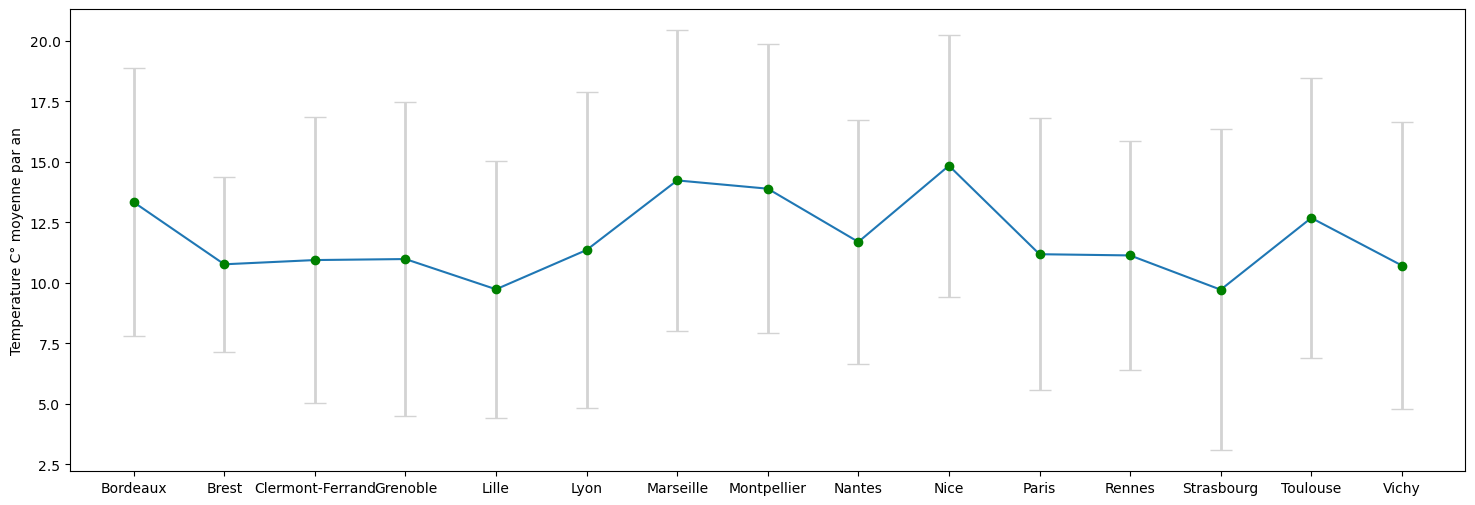

In [343]:
mean_temp = x1.mean(1)
std_temp = x1.std(1)

cities = file1["villes"]

plt.figure(figsize=(18, 6))
plt.plot(cities, mean_temp)
plt.errorbar(
    cities,
    mean_temp,
    std_temp,
    fmt="o",
    color="green",
    ecolor="lightgray",
    elinewidth=2,
    capsize=8,
)
plt.ylabel("Temperature C° moyenne par an")

Text(0, 0.5, 'Temperature C°')

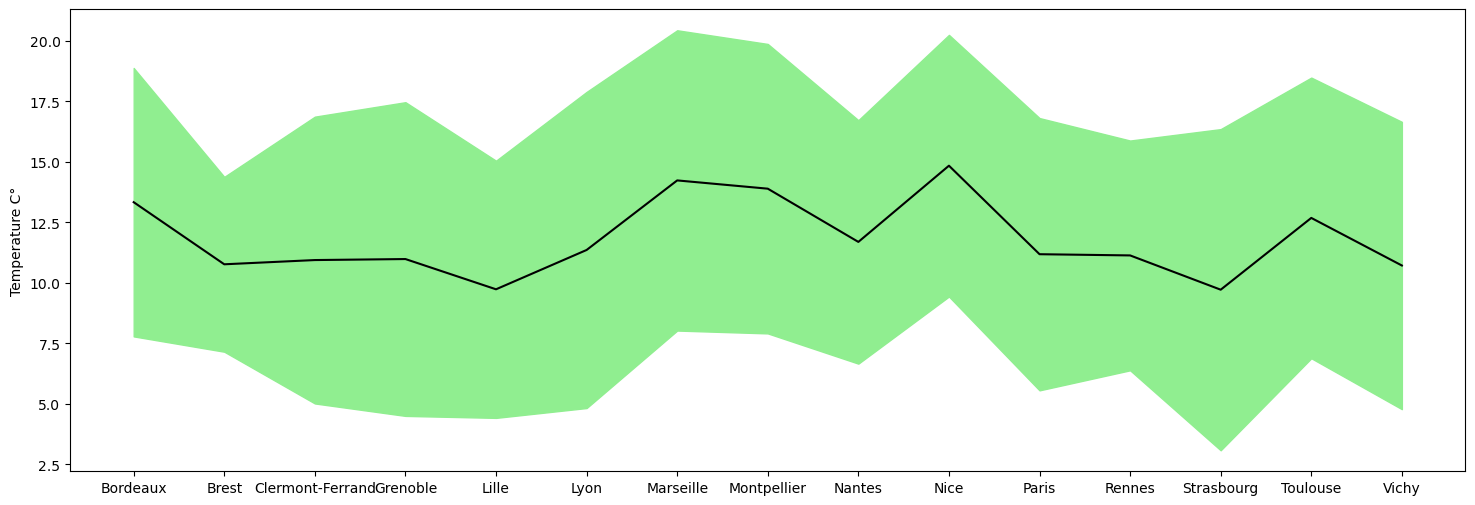

In [344]:
plt.figure(figsize=(18, 6))
plt.plot(cities, mean_temp, "k-")
plt.fill_between(cities, mean_temp - std_temp, mean_temp + std_temp, color="lightgreen")
plt.ylabel("Temperature C°")

Moyenne par variable (mois)

Text(0, 0.5, 'Temperature C° moyenne par mois')

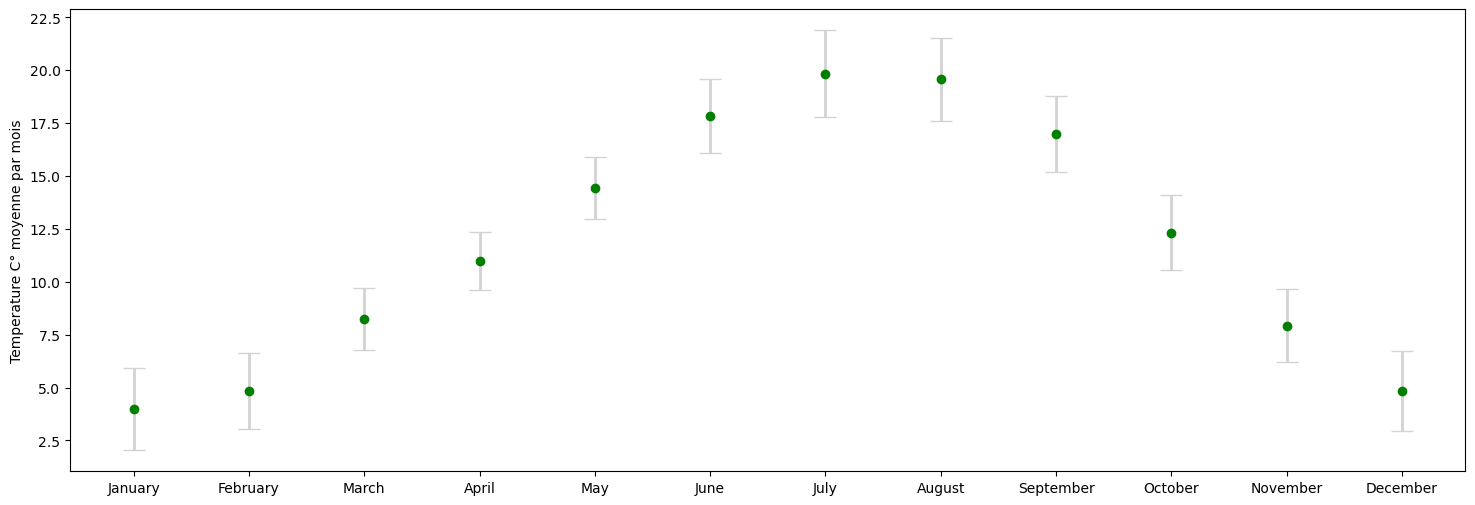

In [345]:
mean_temp_mois = x1.mean(0)
std_temp_mois = x1.std(0)

vn = file1["varname"][:12]

plt.figure(figsize=(18, 6))
# plt.errorbar(v, mean_temp , std_temp, linestyle='None', marker='^')
plt.errorbar(
    vn,
    mean_temp_mois,
    std_temp_mois,
    fmt="o",
    color="green",
    ecolor="lightgray",
    elinewidth=2,
    capsize=8,
)
plt.ylabel("Temperature C° moyenne par mois")

Text(0, 0.5, 'Temperature C° moyenne par mois')

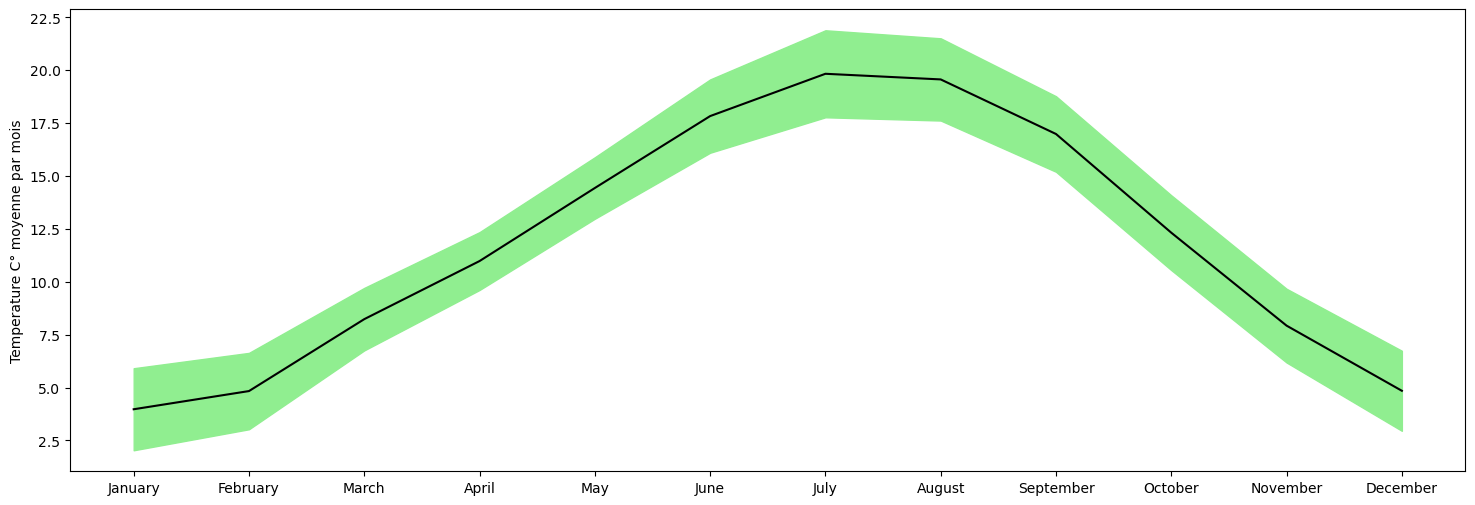

In [346]:
plt.figure(figsize=(18, 6))
plt.plot(vn, mean_temp_mois, "k-")
plt.fill_between(
    vn,
    mean_temp_mois - std_temp_mois,
    mean_temp_mois + std_temp_mois,
    color="lightgreen",
)
plt.ylabel("Temperature C° moyenne par mois")

#### Dataset 2

Moyenne par pixel

In [347]:
x2_mean = x2.mean(0)

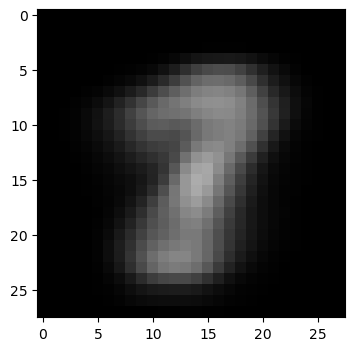

In [348]:
plt.figure(figsize=(4, 4))
plt.imshow(x2_mean.reshape(28, 28), cmap="gray", vmin=0, vmax=1)

### 1.3.3
(Bonus) Reproduce the Figures above.

#### Dataset 1

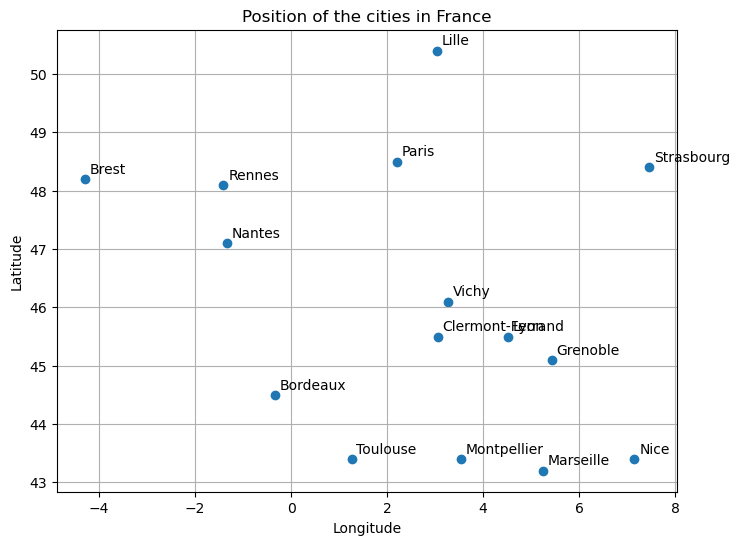

In [349]:
cord_data = file1["data"]
cord = cord_data[:, 12:]

# plt.scatter(cord.T[1], cord.T[0], alpha = 0.6, s=100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cord.T[1], cord.T[0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid()
ax.title.set_text("Position of the cities in France")
for i, txt in enumerate(cities):
    ax.annotate(txt, (cord.T[1][i] + 0.1, cord.T[0][i] + 0.1))
plt.show()

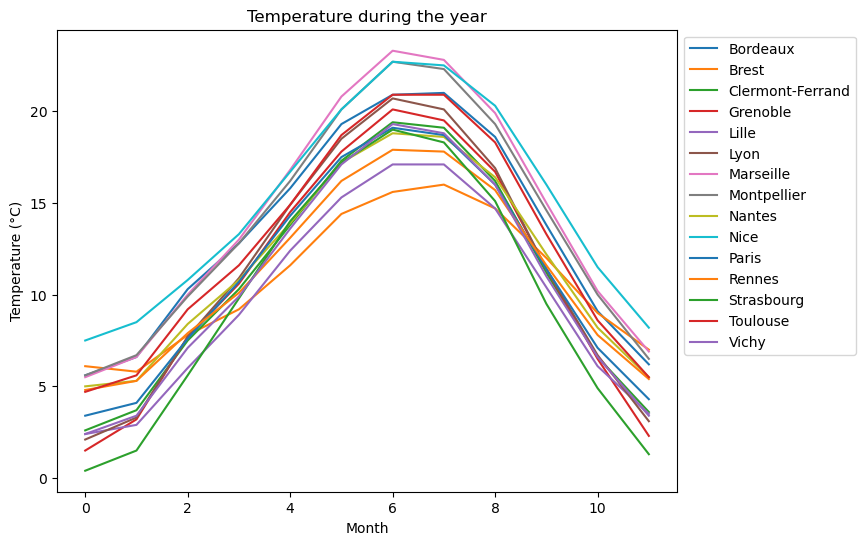

In [15]:
plt.figure(figsize=(8, 6))
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature during the year")
plt.plot(x1.T)
plt.legend(cities, loc=1, bbox_to_anchor=(1.3, 1))

#### Dataset 2

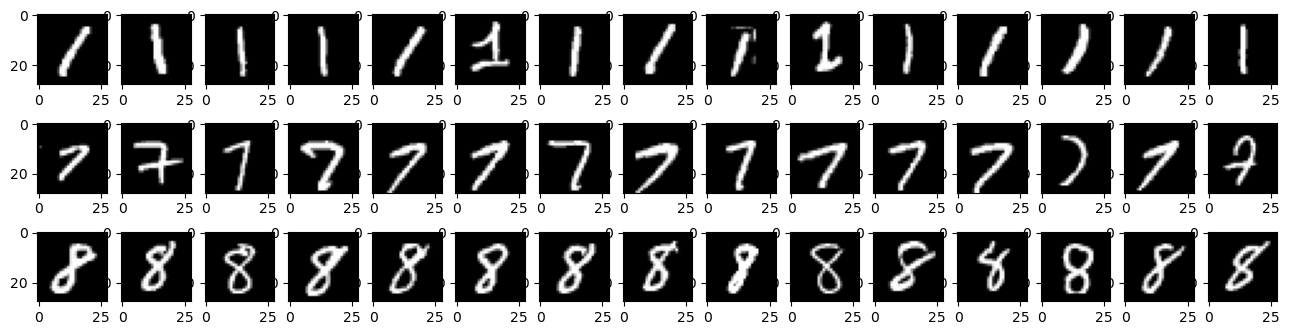

In [16]:
fig = plt.figure(figsize=(16, 4))
my_range = np.concatenate(
    [np.arange(0, 15), np.arange(1001, 1016), np.arange(2001, 2016)]
)
for item, c in zip(my_range, range(len(my_range))):
    ax1 = fig.add_subplot(3, 15, c + 1)
    ax1.imshow(x2[item].reshape(28, 28), cmap="gray")
plt.show()

# 2. Clustering

## 2.1 For both datasets

### 2.1.1
Perform K-means clustering on the data (K = 3, sklearn.cluster.Kmeans) and store the cluster
centroids and the estimated classes for all samples.

#### Dataset 1

In [350]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=3, random_state=0).fit(x1)

estimated_class = kmeans1.labels_
cluster_centroid = kmeans1.cluster_centers_

#### Dataset 2

In [351]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans2 = KMeans(n_clusters=n_clusters, random_state=0).fit(x2)

estimated_class2 = kmeans2.labels_
cluster_centroid2 = kmeans2.cluster_centers_

### 2.1.2
Plot the centroids and interpret them (how are the samples clustered? by class on digits? geographical
position for the cities?).

#### Dataset 1

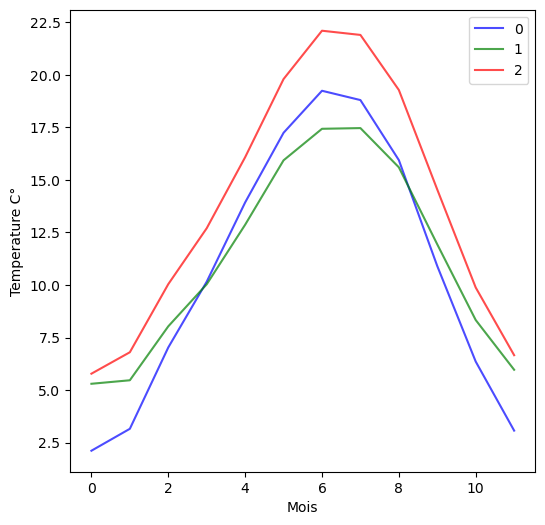

In [353]:
display(HTML("<h3> Plot des centroid en fonction des features ( les mois )</h3>"))

plt.figure(figsize=(6, 6))

for i, item in enumerate(cluster_centroid):
    plt.plot(item, label=i, c=colors[i], alpha=0.7)
plt.ylabel("Temperature C°")
plt.xlabel("Mois")
plt.legend();

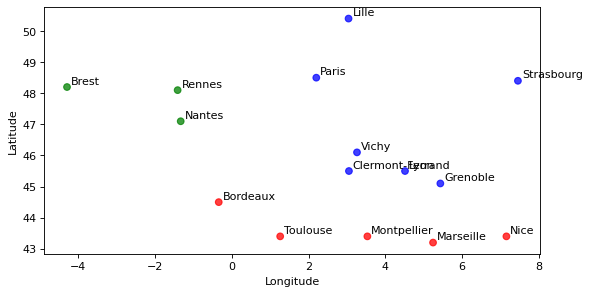

In [355]:
display(HTML("<h3> Plot des villes avec couleurs pour chaque cluster </h3>"))

plt.figure(figsize=(8, 4), dpi=80)

plt.scatter(
    cord[:, 1],
    cord[:, 0],
    marker="o",
    c=[colors[i] for i in estimated_class],
    alpha=0.75,
)

for i, point in enumerate(cord):
    plt.annotate(cities[i], (cord[i, 1] + 0.1, cord[i, 0] + 0.1))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show();

Nous remarquons que les villes de sud sont principalement les plus chaudes pendant toute l'année, par contre les villes du nord-est sont tres foides pendant l'hiver et legerement chaudes pendant l'été. En outre les villes du nord-ouest sont moins froid que l'est pendant l'hivers mais aussi moins chaude pendant l'été (climat modèré)

#### Dataset 2

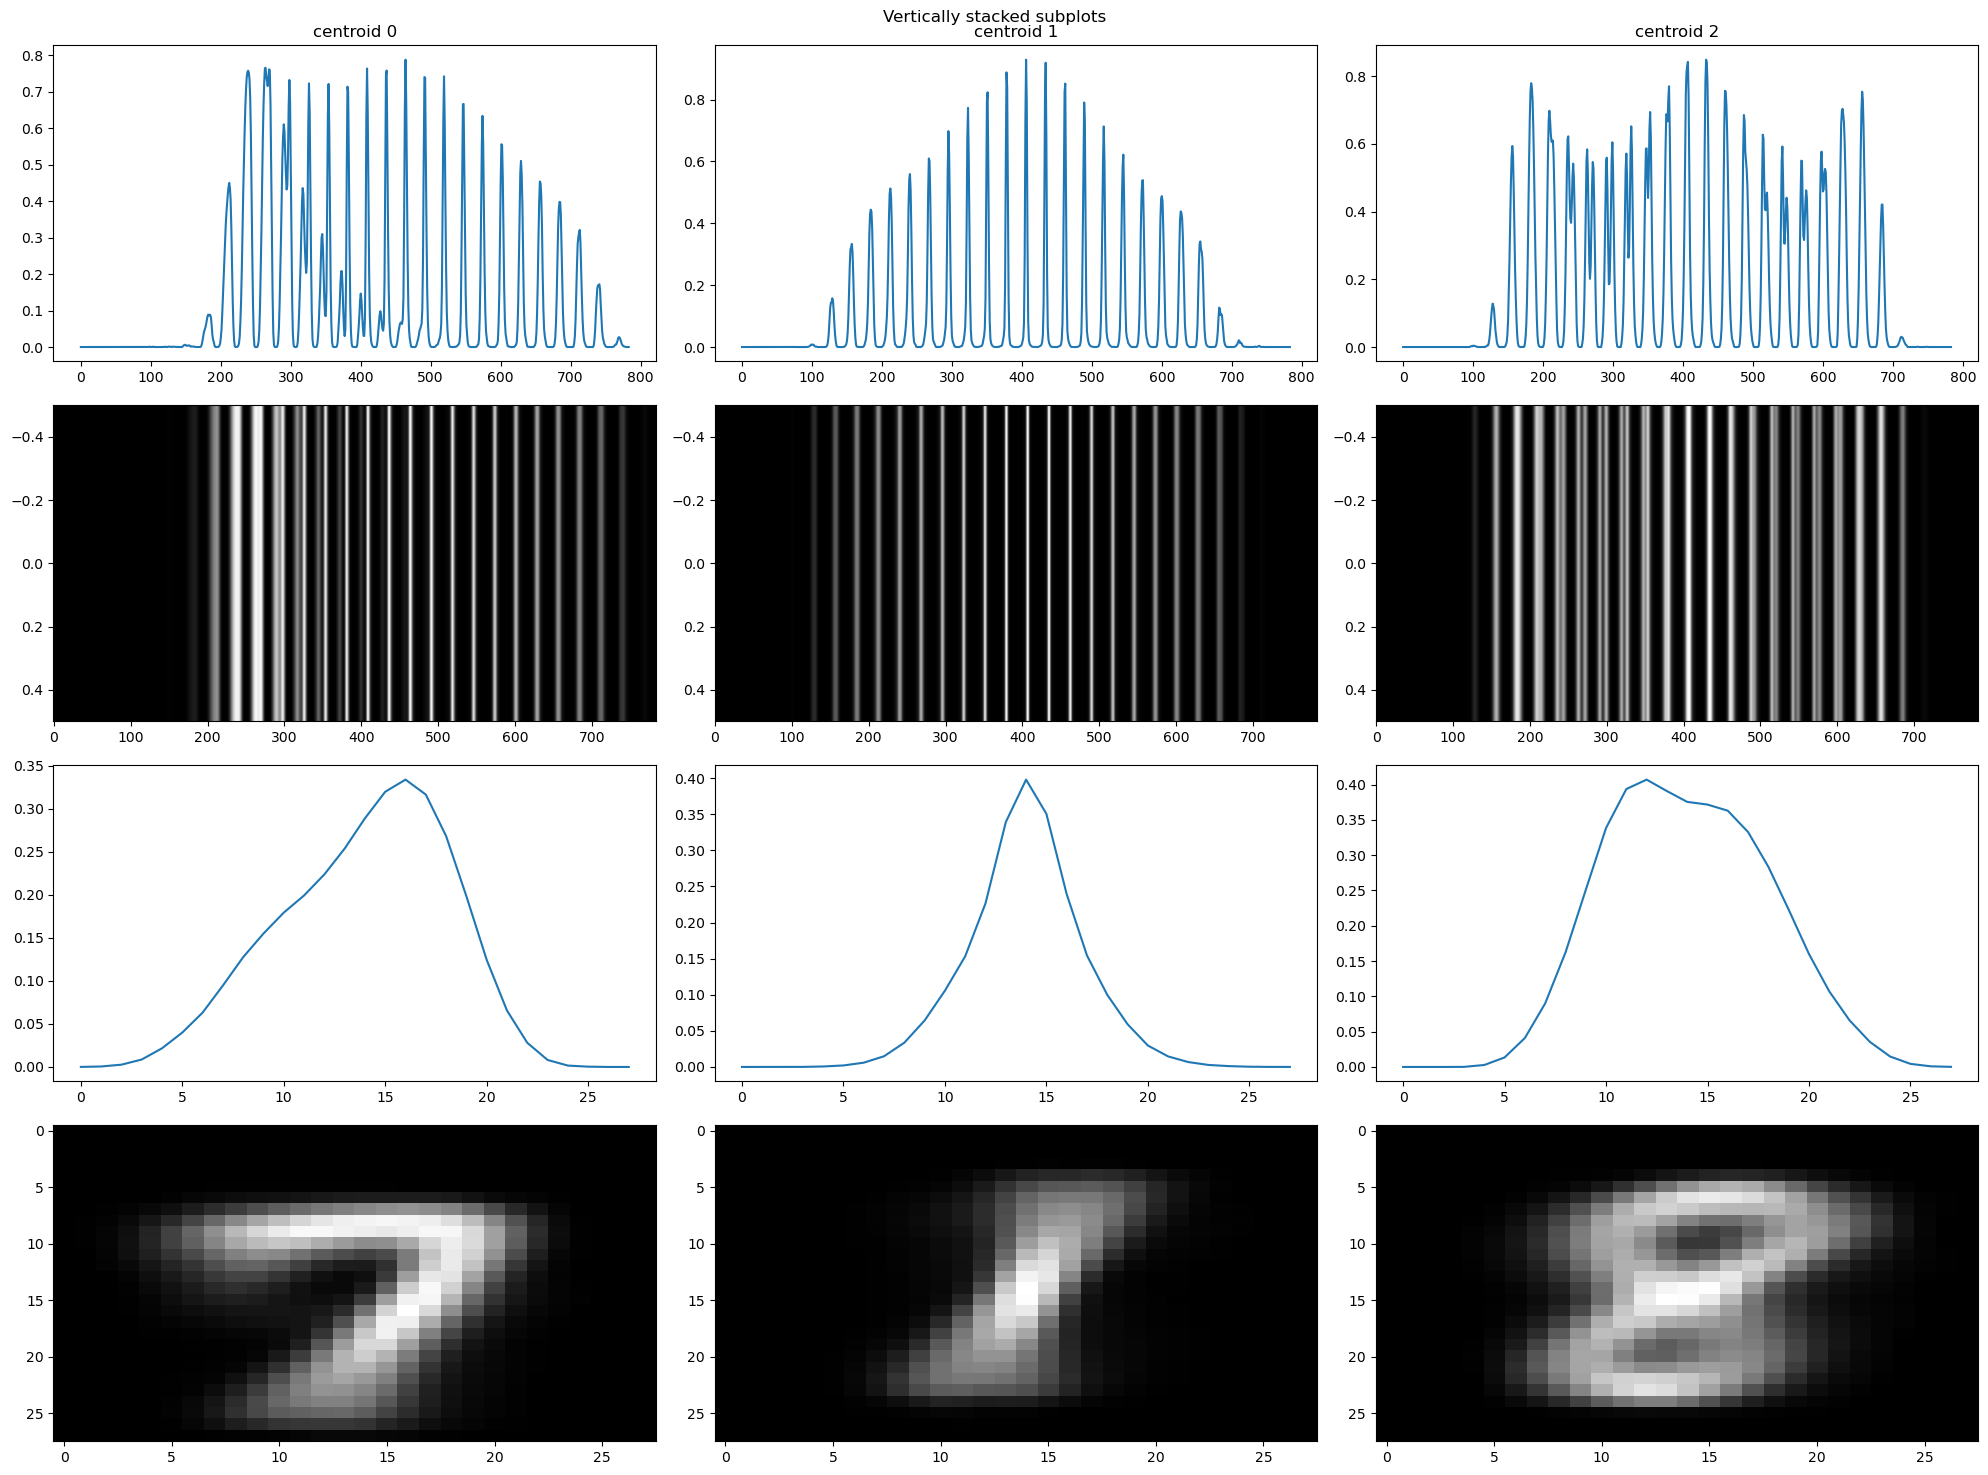

In [22]:

n_clusters = 3
fig, axs = plt.subplots(4, n_clusters, figsize=(20, 15))
fig.suptitle("Vertically stacked subplots")
for i, item in enumerate(cluster_centroid2):
    axs[0][i].plot(item)
    axs[1][i].imshow(item.reshape(784, 1).T, aspect="auto", cmap="gray")
    axs[2][i].plot(item.reshape(28, 28).mean(0))
    axs[3][i].imshow(item.reshape(28, 28), aspect="auto", cmap="gray")
    axs[0][i].set_title("centroid " + str(i))

fig.tight_layout()

After reshaping the 784 vectors to 28,28 , we can conclude that each centroid encodes exactly the white and black colors of images, so the signal is propotional to the strenght of white colors (first plot)

in order to interpret the results, we compute the mean of each pixel of the 28 vertical pixels which gives the strenght of white signal in each horizontal pixel.

indeed the 8 for instance , has a signal larger than the one's
<br/>
and 7's signal is strong only from left which encode exactly how the number is writen

moreover, in the second plots we notice that for 7 , the layers between 200 and 300 have a strong white signal because it maps a continious white signal

however the second plot is a proof that the number one is skinny (with signal less strong) and the eight number has a strong signal in the top and buttom but medium size in the middle , so it explain exactly the form of the signals

### 2.1.3
Change the value of K and repeat the two previous steps. What are good values in your opinion and
why?


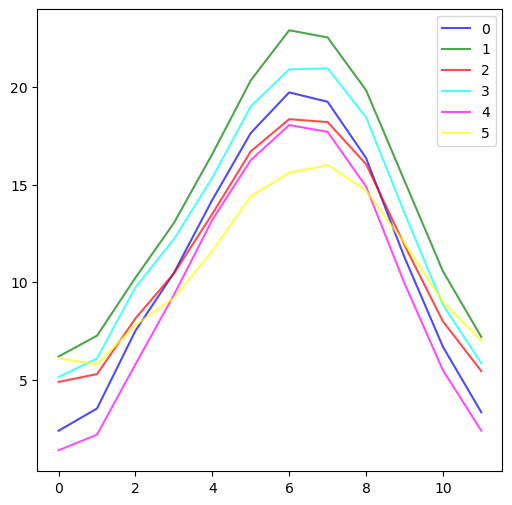

In [356]:
display(HTML("<h3> plot of k = 6 for temerature data set</h3>"))
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=6, random_state=0).fit(x1)
estimated_class3 = kmeans3.labels_
cluster_centroid3 = kmeans3.cluster_centers_

plt.figure(figsize=(6, 6))
for i, item in enumerate(cluster_centroid3):

    plt.plot(item, label=i, c=colors[i], alpha=0.7)
plt.legend();

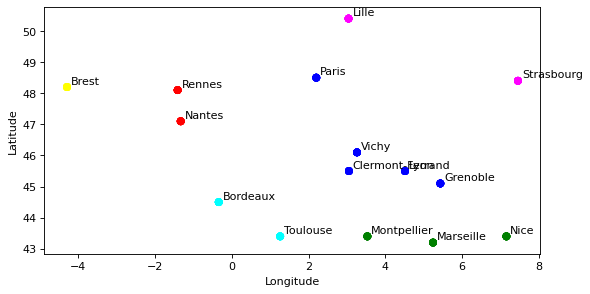

In [358]:
display(HTML("<h3> ploting the same thing with geographical coordinates</h3>"))
plt.figure(figsize=(8, 4), dpi=80)

for i, point in enumerate(cord):
    plt.scatter(
        cord[:, 1],
        cord[:, 0],
        marker="o",
        c=[colors[i] for i in estimated_class3],
        linewidths=1,
        alpha=0.75,
    )
    plt.annotate(cities[i], (cord[i, 1] + 0.1, cord[i, 0] + 0.1))
plt.xlabel("Longitude")
plt.ylabel("Latitude");

- we notice that from each cluster the model generate two clusters , which are very close, and which means that the original clusters were well separated

- for instance, brest is the closest to The Mediterranean Sea and it's the coldest during summer and the hottest during winter

- however Montpellier, marseille, and Nice are the most hottest during the whole year, because they are in the south 
and the blue cluster is between the others even geographically

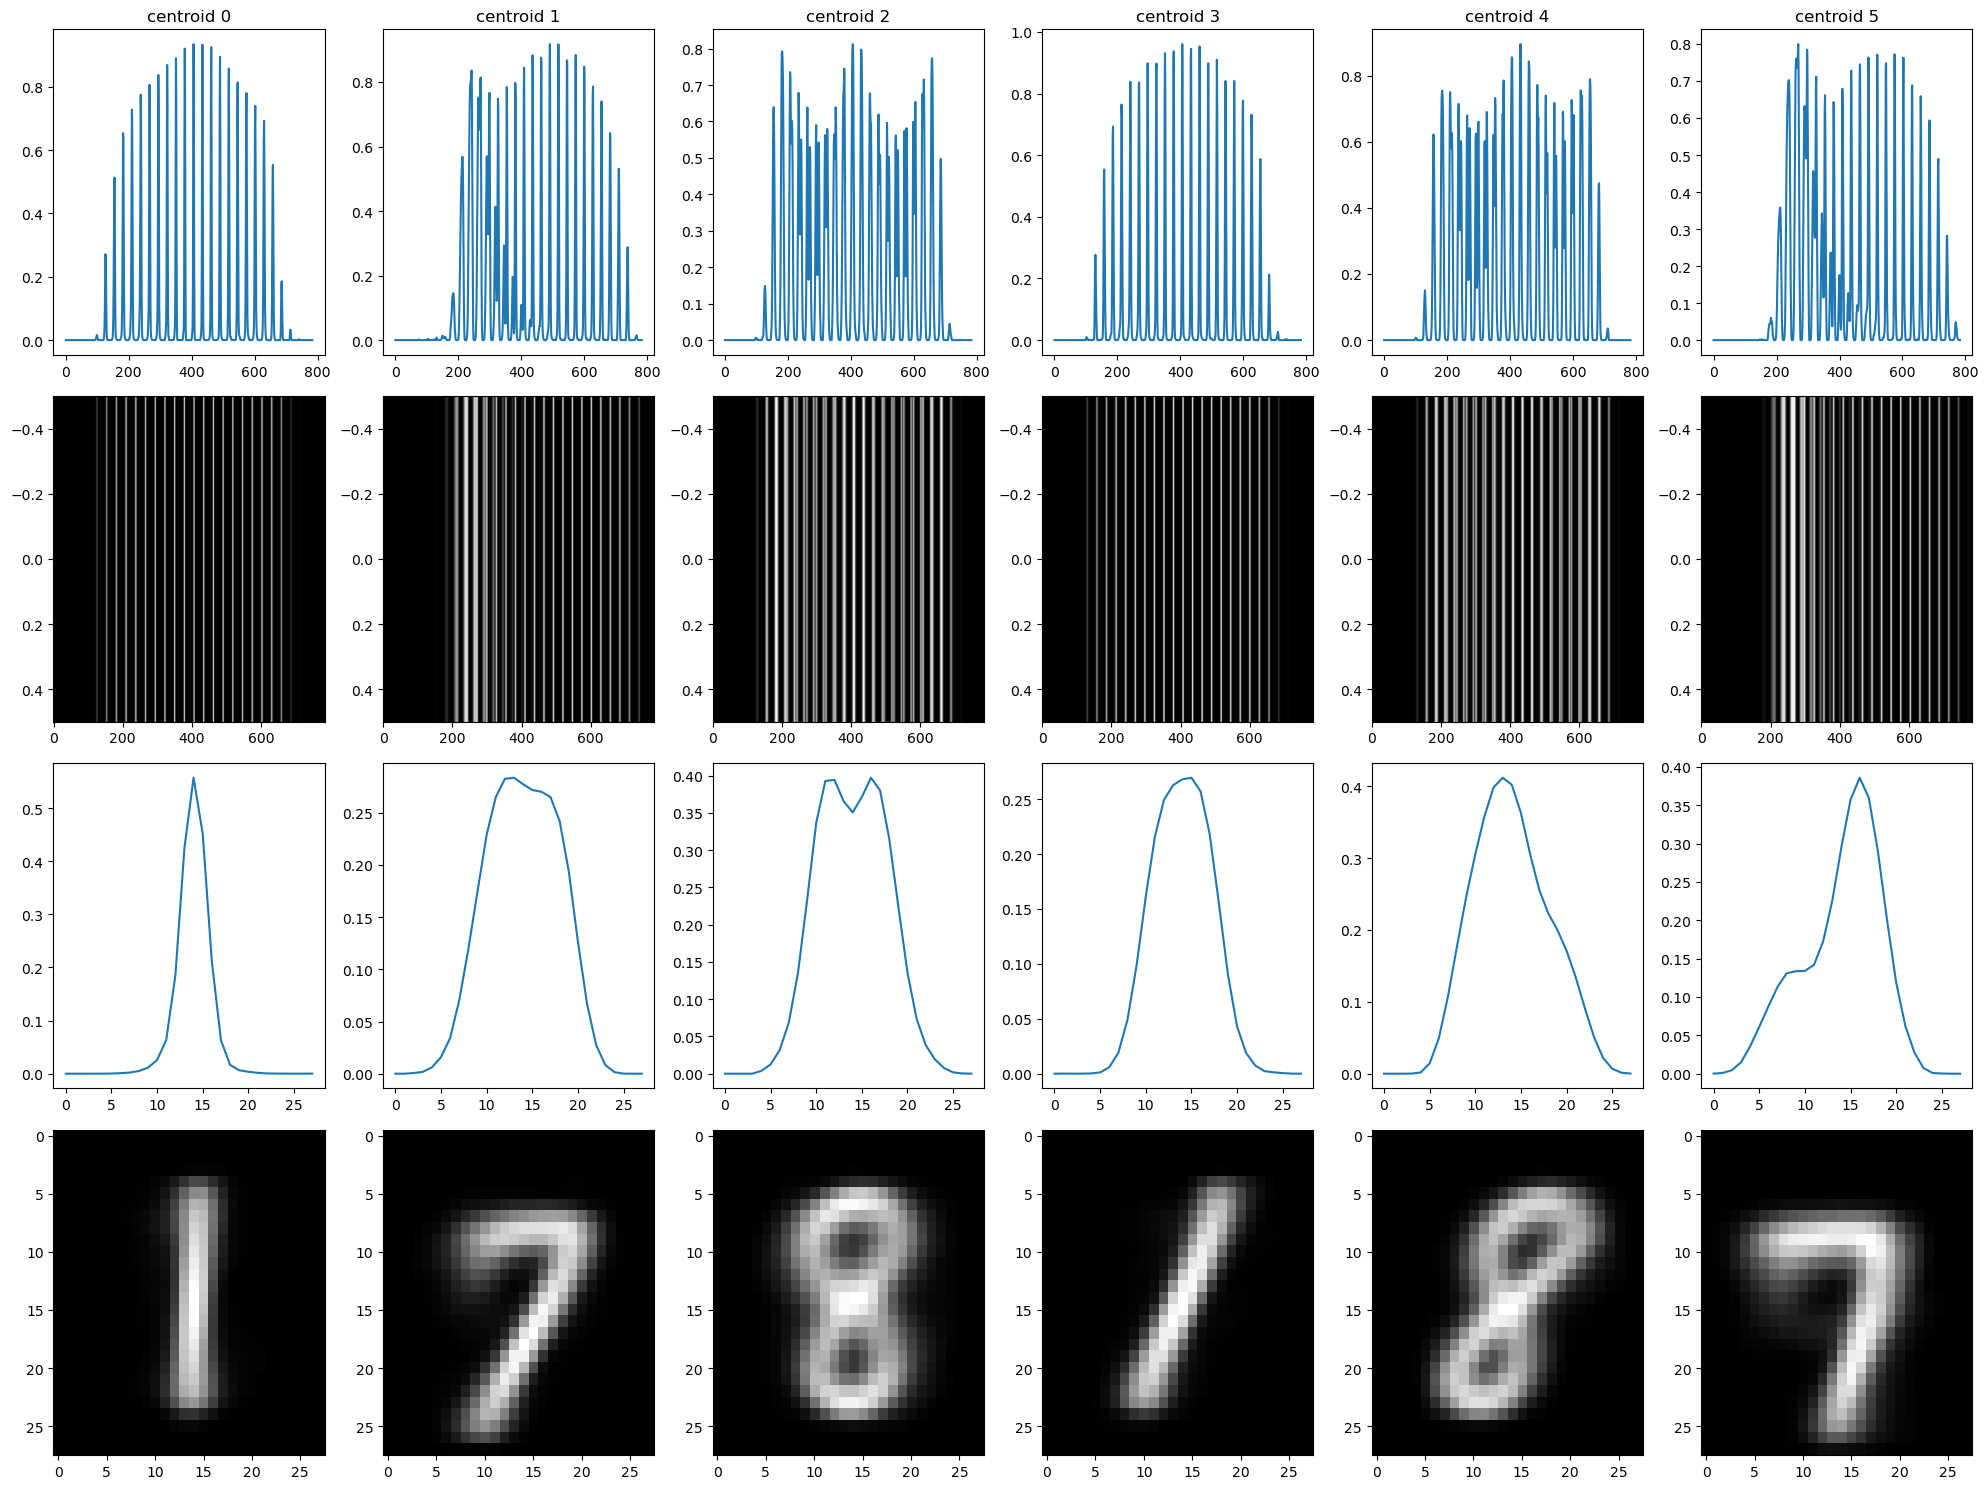

In [360]:
display(HTML("<h3> <b>Digits </b> data set with 6 cluster</h3>"))

n_clusters = 6
reshapeN = 1
kmeans4 = KMeans(n_clusters=n_clusters, random_state=0).fit(x2)

estimated_class4 = kmeans4.labels_
cluster_centroid4 = kmeans4.cluster_centers_


fig, axs = plt.subplots(4, n_clusters, figsize=(20, 15))
for i, item in enumerate(cluster_centroid4):
    axs[0][i].plot(item.reshape(int(784 / reshapeN), reshapeN))
    axs[1][i].imshow(
        item.reshape(int(784 / reshapeN), reshapeN).T, aspect="auto", cmap="gray"
    )
    axs[2][i].plot(item.reshape(28, 28).mean(0))
    axs[3][i].imshow(item.reshape(28, 28), aspect="auto", cmap="gray")
    axs[0][i].set_title("centroid " + str(i))

fig.tight_layout()

- when we added more clusters , we got a new set of clusters of the same classes but with a slight difference,(the signals are slightly different)



#### lets explain why the same cluster is splited to two new clusters

in the figure below 

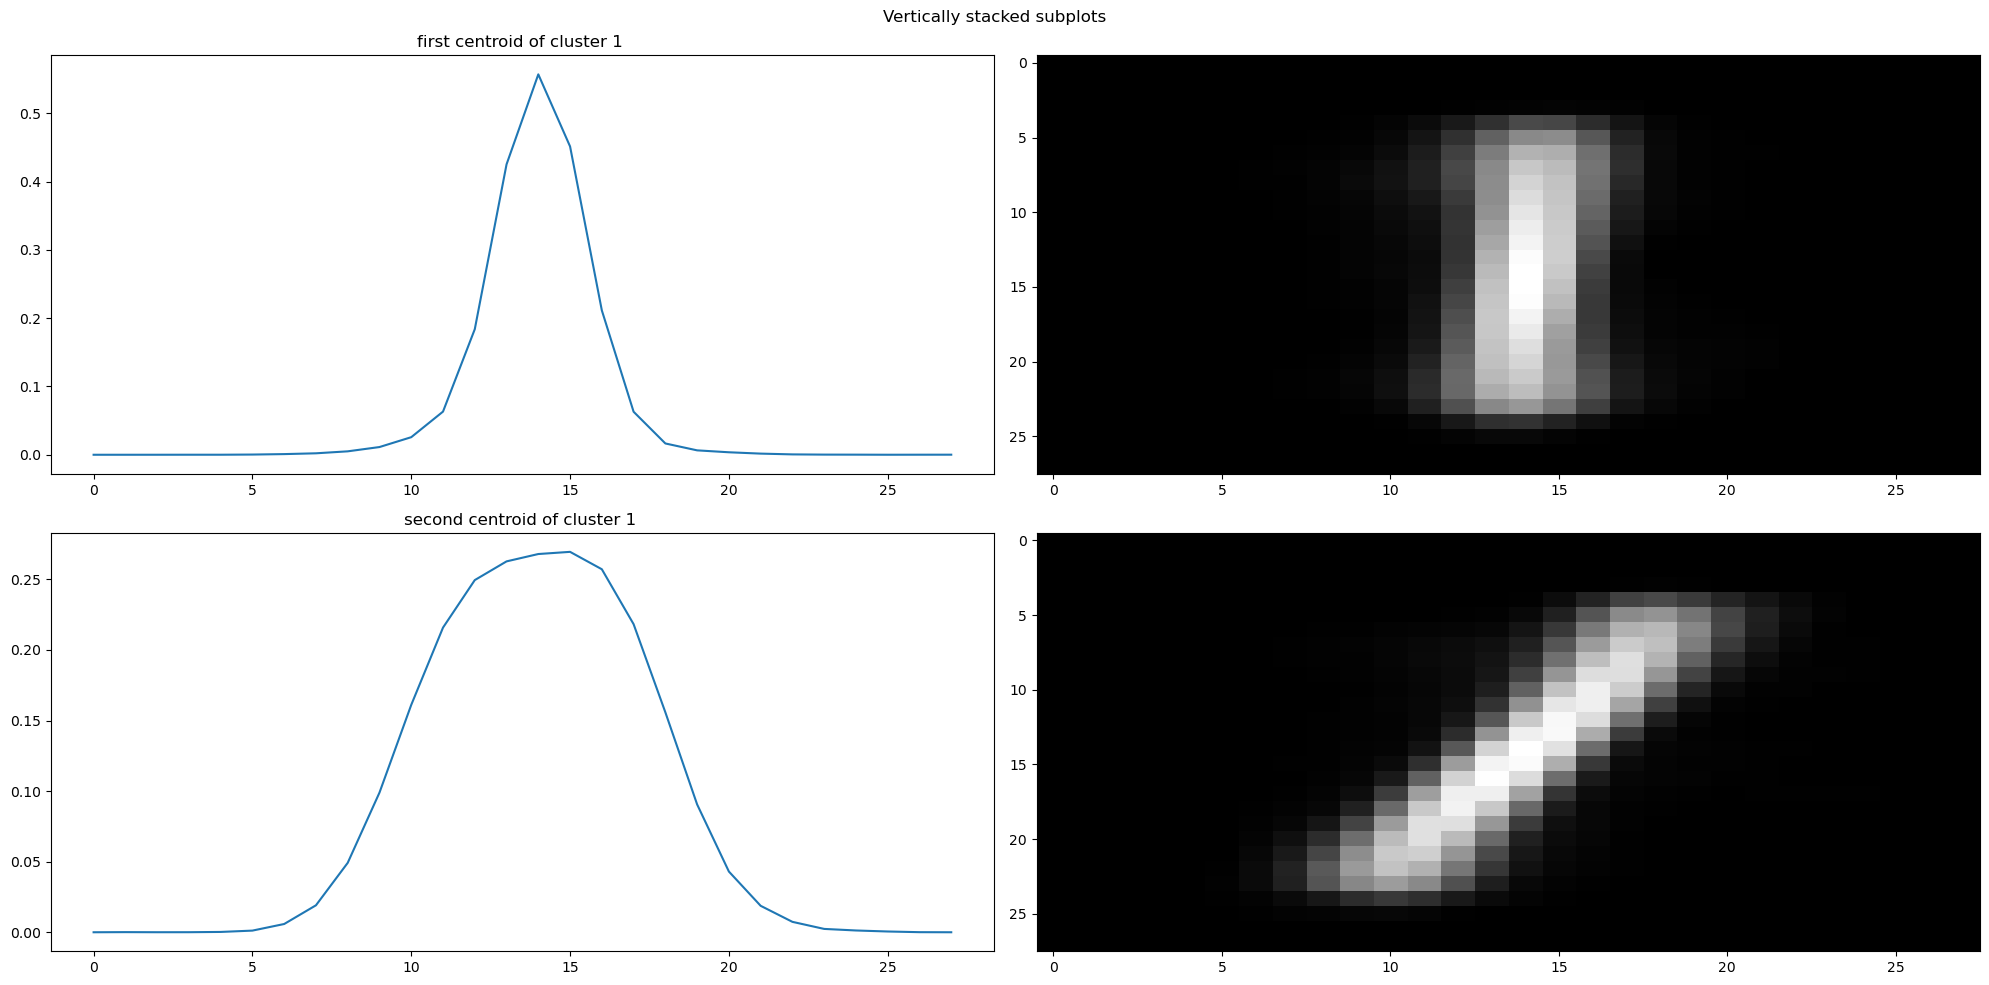

In [361]:
display(HTML("<h3> studing two cluster with same label </h3>"))
n_clusters = 6
reshapeN = 28
kmeans4 = KMeans(n_clusters=n_clusters, random_state=0).fit(x2)

estimated_class4 = kmeans4.labels_
cluster_centroid4 = kmeans4.cluster_centers_


fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Vertically stacked subplots")

axs[0][0].plot(cluster_centroid4[0].reshape(int(784 / reshapeN), reshapeN).mean(0))
axs[0][1].imshow(
    cluster_centroid4[0].reshape(int(784 / reshapeN), reshapeN),
    aspect="auto",
    cmap="gray",
)
axs[0][0].set_title("first centroid of cluster 1 ")
axs[1][0].plot(cluster_centroid4[3].reshape(int(784 / reshapeN), reshapeN).mean(0))
axs[1][1].imshow(
    cluster_centroid4[3].reshape(int(784 / reshapeN), reshapeN),
    aspect="auto",
    cmap="gray",
)
axs[1][0].set_title("second centroid of cluster 1 ")

fig.tight_layout()

the number 1 when it's inclined, it gives a signal larger but less strong, because it's not compact and when we align the pixels, the position of features changes

## 2.2 Temperature dataset

### 2.2.1
Look at the name of the cities in each clusters. Do the clustering make sens?


In [363]:
np.vstack((cities, estimated_class)).T
my_dict = dict()
for ville, classe in zip(cities, estimated_class):
    if classe in my_dict.keys():
        my_dict[classe] += [ville]
    else:
        my_dict[classe] = [ville]
my_dict

{2: ['Bordeaux', 'Marseille', 'Montpellier', 'Nice', 'Toulouse'],
 1: ['Brest', 'Nantes', 'Rennes'],
 0: ['Clermont-Ferrand',
  'Grenoble',
  'Lille',
  'Lyon',
  'Paris',
  'Strasbourg',
  'Vichy']}

- the cluster 2 has only south cities
- the cluster 1 contains the ouest cities
- the cluster 0 contains the est cities

### 2.2.2
Plot the cities with a scatterplot using their geographical position and using the estimated class as
color. Do the K-means clustering on temperature recover a geographical similarity between cities?
Why?


Text(0, 0.5, 'Latitude')

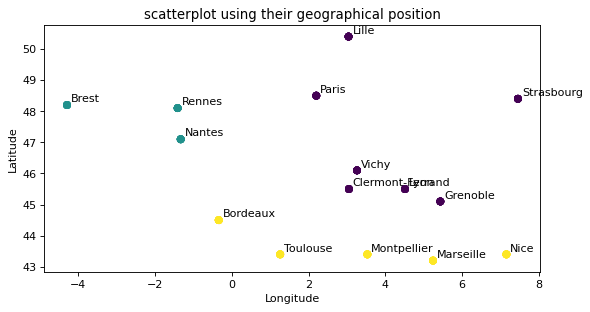

In [364]:
plt.figure(figsize=(8, 4), dpi=80)
plt.title("scatterplot using their geographical position")
for i, point in enumerate(cord):
    plt.scatter(
        cord[:, 1], cord[:, 0], marker="o", c=estimated_class, linewidths=1, alpha=0.75
    )
    plt.annotate(cities[i], (cord[i, 1] + 0.1, cord[i, 0] + 0.1))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

<b>As we discussed earlier :</b>

We notice that the cities in the south are mainly the warmest throughout the year, on the other hand the cities in the northeast are very cold during the winter and slightly warmer during the summer. In addition, the cities of the northwest are less cold than the east during the winters but also less hot during the summer (moderate climate)



## 2.3 Digits dataset

### 2.3.1
Does the clusters resemble a true image from the dataset ? Could you tell if a cluster centroid is a
true image. Why ?

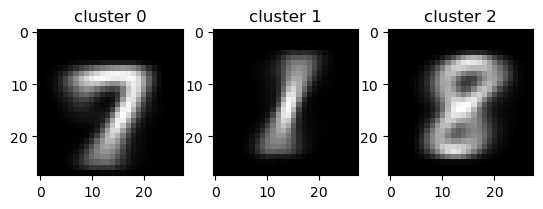

In [378]:
fig = plt.figure()
display(HTML("<h3>Cluster of the digits k-means</h3>"))

for i in range(cluster_centroid2.shape[0]):
    ax1 = fig.add_subplot(1, 3, i + 1)
    ax1.imshow(cluster_centroid2[i].reshape(28, 28), cmap="gray")
    ax1.title.set_text(f"cluster {i}")

plt.show()

- the clusters resemble a true image from data sets, but this is not a real image, it is actually the average of the pixel values over an entire cluster. So the images generated above are the combined average of all the observations per sample, that's why we see blurring.

### 2.3.2
Plot the predicted labels (as a signal). Since the samples are ordered by class in the dataset, a clustering
respecting the true class should be piecewise constant. Is that the case?


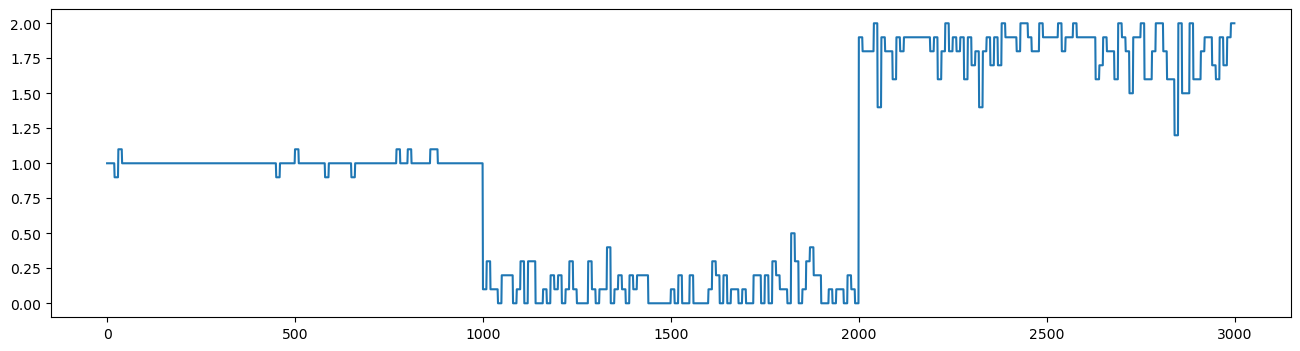

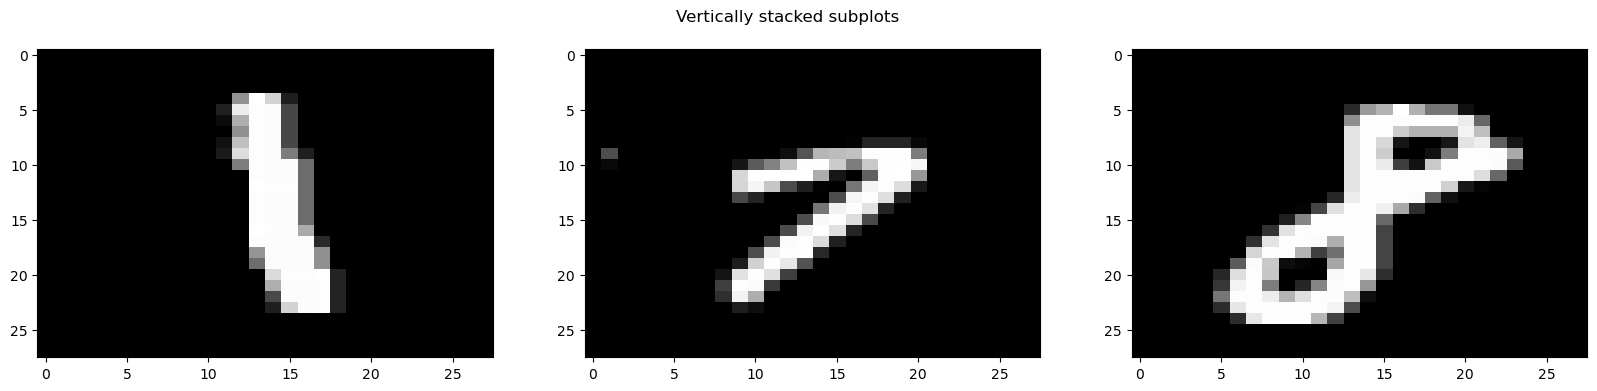

In [369]:
display(
    HTML(
        "<h3>Predicted labels as a signal ponderated on for 10 samples (mean of 10) </h3>"
    )
)

plt.figure(figsize=(16, 4))
NMean = 10
plt.plot(
    np.repeat(
        estimated_class2.reshape(int(len(estimated_class2) / NMean), NMean).mean(1),
        NMean,
    )
)
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle("Vertically stacked subplots")

for i, item in enumerate(x2[1::1000]):
    axs[i].imshow(item.reshape(28, 28), aspect="auto", cmap="gray")


plt.show()

it's almost piecewise constant , because the predictions aren't accure 100 %

More over , the first cluster (1 ) has less fluctuations because if it makes one mistake it's absolutely of distance==1 , however the other clusters could do mistakes with distance == 1 or distance == 2, which make them fluctuate more

Further more, based on the frequency of the fluctuations, we can argue that the prediction of 8 and 7 make more error, because, when they are writen with tight width, the model could confuse between them and the 1 

### 2.3.3
Compute the quality of the clustering using the ground truth labels (sklearn.metric.rand_score,
sklearn.metric.adjusted_rand_score).

<b>rand_score</b>

In [370]:
from sklearn.metrics.cluster import adjusted_rand_score, rand_score

score = rand_score(y2.flatten(), estimated_class2)
print(
    f"the quality of the clustering using the ground truth labels **rand_score** : {score*100:.2f}"
)

the quality of the clustering using the ground truth labels **rand_score** : 88.16


<b>Adjusted_rand_score</b>

In [371]:
score = adjusted_rand_score(y2.flatten(), estimated_class2)
print(
    f"the quality of the clustering using the ground truth labels **rand_score** : {score*100:.2f}"
)

the quality of the clustering using the ground truth labels **rand_score** : 73.53


### 2.3.4
See the effect of the parameter K on the clustering score. What is the K that leads to the best score?
Why?


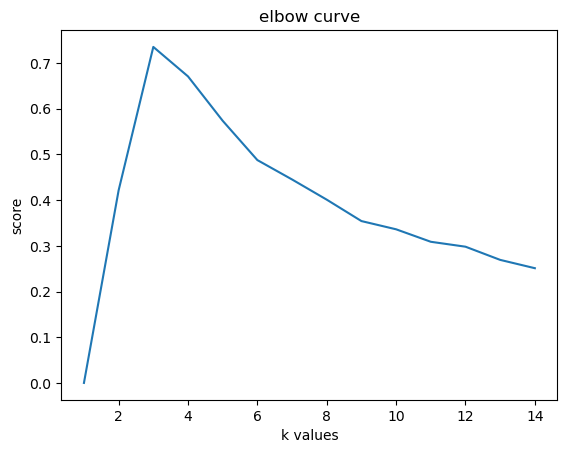

In [373]:
scores_K = []
for i in range(1, 15):
    kmeans_sens = KMeans(n_clusters=i, random_state=0).fit(x2)
    estimated_class_k = kmeans_sens.labels_
    score = adjusted_rand_score(y2.flatten(), estimated_class_k)
    scores_K += [score]

axis_k = np.arange(1, 15, 1)
plt.title("elbow curve")
plt.xlabel("k values")
plt.ylabel("score")
plt.plot(axis_k, scores_K);

- We can observe that the optimal parameter K is 3 according to the curve (elbow), because it the exact number of the original clusters

# 3 Density estimation

### 3.1.1
Estimate a GMM density on the data with K = 2 for temperature and K = 3 for digits (sklearn.
mixture.GaussianMixture). Due to the relatively high dimensional data and small number of samples
we will estimate GMM with diagonal covariances (covariance_type=’diag’).

In [374]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0, covariance_type="diag").fit(x1)
estimated_class_gm = gm.predict(x1)
# gm.means_

In [375]:
gm2 = GaussianMixture(n_components=3, random_state=0, covariance_type="diag").fit(x2)
gm2.means_
estimated_class_gm2 = gm2.predict(x2)

### 3.1.2
Plot the centers of the Gaussian distributions in the mixture and interpret them

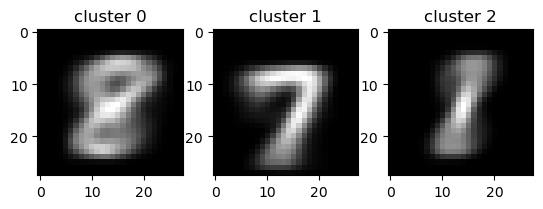

In [381]:
fig = plt.figure()
display(
    HTML("<h3>center of the guassian distributions for <b>digit</b> data set </h3>")
)
for i in range(gm2.means_.shape[0]):
    ax1 = fig.add_subplot(1, 3, i + 1)
    ax1.imshow(gm2.means_[i].reshape(28, 28), cmap="gray")
    ax1.title.set_text(f"cluster {i}")

plt.show()

- apparently the clusters represent perfectly the data, since we can distinguish between the numbers. however the images are slightly blur.

- We can explain this results by the fact that the covariance_type=="diag" imposes the ellipse to go along axis 

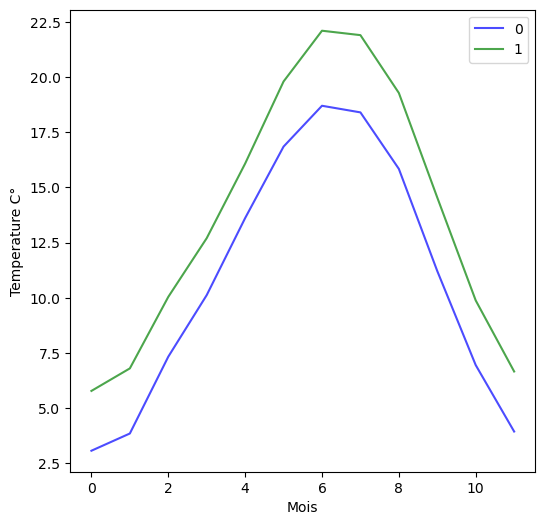

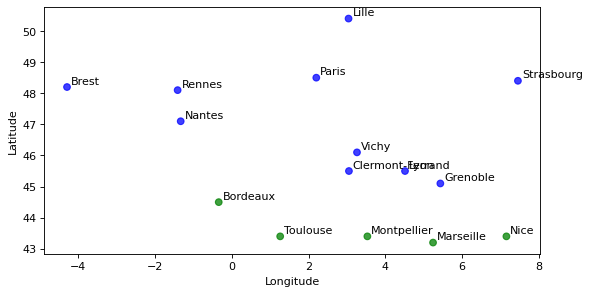

In [383]:
display(
    HTML(
        "<h3>center of the guassian distributions for <b>Temperature</b> data set </h3>"
    )
)
plt.figure(figsize=(6, 6))

for i, item in enumerate(gm.means_):

    plt.plot(item, label=i, c=colors[i], alpha=0.7)
plt.ylabel("Temperature C°")
plt.xlabel("Mois")
plt.legend()
plt.figure(figsize=(8, 4), dpi=80)

plt.scatter(
    cord[:, 1],
    cord[:, 0],
    marker="o",
    c=[colors[i] for i in estimated_class_gm],
    linewidths=1,
    alpha=0.75,
)

for i, point in enumerate(cord):
    plt.annotate(cities[i], (cord[i, 1] + 0.1, cord[i, 0] + 0.1))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show();

- We can see cleary that the model separate the south cities from the nord, based on the temperature. which we explain by the fact that the cluster of south cities are generally warm comparing to the nord

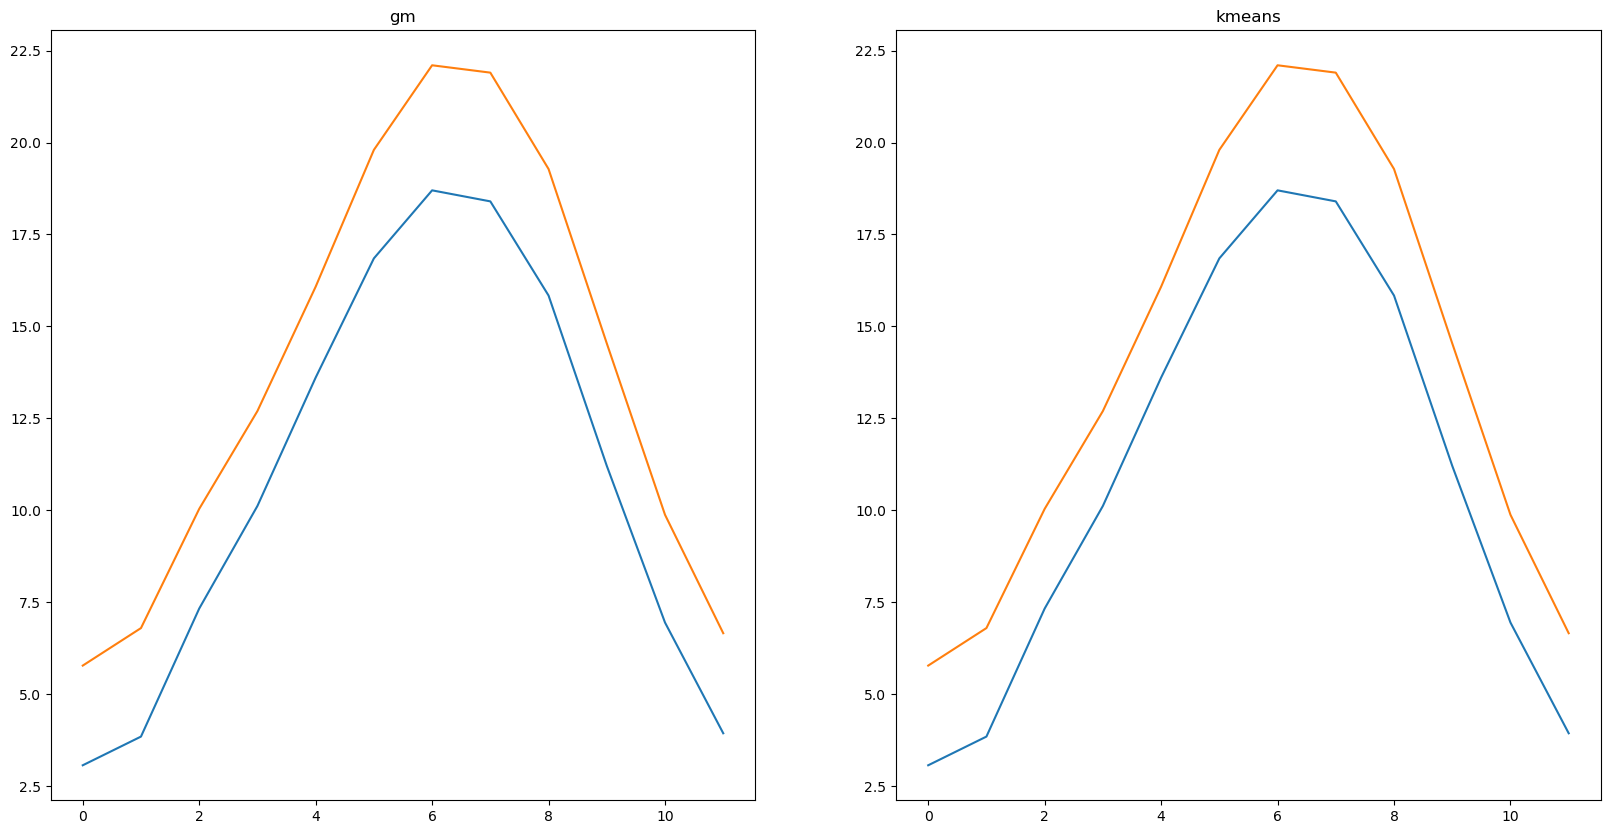

In [386]:
display(
    HTML("<h3>Comparing gmm and k-means results on <b>Temperature</b> data set </h3>")
)
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(x1)

estimated_class = kmeans1.labels_
cluster_centroid = kmeans1.cluster_centers_
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
# plt.subplots(figsize=(20, 2))
axs[0].plot(gm.means_.T)
axs[1].plot(cluster_centroid.T)
axs[0].set_title("gm")
axs[1].set_title("kmeans");

- we notice that the results are exactly the same of k means. and it's logical , since we chose covariance_type =="diag" which imposes ellipse constrained to align with the axes. so it's so close from k means which is equivalent to gmm with "spherical" covariance_type to construct a spherical shape

### 3.1.3
Change the value of K and repeat the two previous steps. What are good values in your opinion and
why? Change the shape of the covariance, how well are they estimated on both datasets?

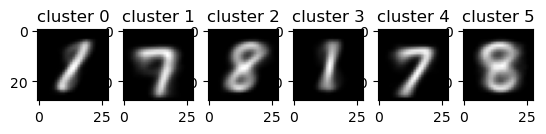

In [387]:
display(HTML("<h3>for k = 6 clusters with gmm on <b>digit</b> data set </h3>"))
gm = GaussianMixture(n_components=6, random_state=0, covariance_type="diag").fit(x1)
estimated_class_gm = gm.predict(x1)
gm.means_
gm2 = GaussianMixture(n_components=6, random_state=0, covariance_type="diag").fit(x2)
gm2.means_
estimated_class_gm2 = gm2.predict(x2)
fig = plt.figure()
for i in range(gm2.means_.shape[0]):
    ax1 = fig.add_subplot(1, 6, i + 1)
    ax1.imshow(gm2.means_[i].reshape(28, 28), cmap="gray")
    ax1.title.set_text(f"cluster {i}")

plt.show();

- when we force the model to generate more clusters than the true cluster, the model take into consideration even the smallest difference in order to separate between cluster. because we assume than always data in the same true cluster has a variance, so basicly the model minimize it by spliting each cluster to two most different clusters

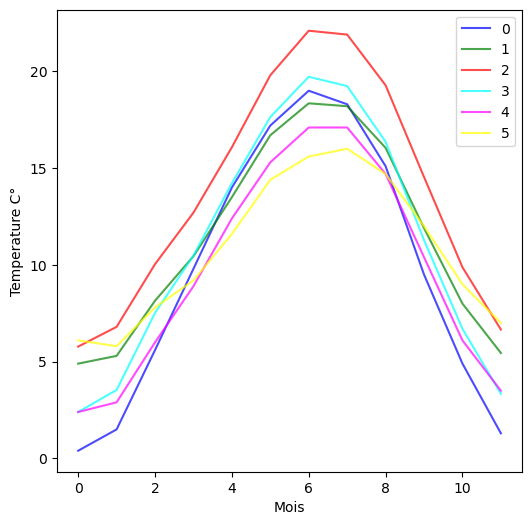

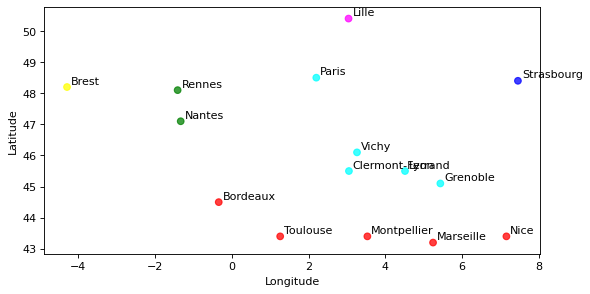

In [389]:
display(HTML("<h3>for k = 6 clusters with gmm on <b>Temperature</b> data set </h3>"))
plt.figure(figsize=(6, 6))

for i, item in enumerate(gm.means_):

    plt.plot(item, label=i, c=colors[i], alpha=0.7)
plt.ylabel("Temperature C°")
plt.xlabel("Mois")
plt.legend()
plt.figure(figsize=(8, 4), dpi=80)

plt.scatter(
    cord[:, 1],
    cord[:, 0],
    marker="o",
    c=[colors[i] for i in estimated_class_gm],
    linewidths=1,
    alpha=0.75,
)

for i, point in enumerate(cord):
    plt.annotate(cities[i], (cord[i, 1] + 0.1, cord[i, 0] + 0.1))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show();

- Exactly as we noticed before, brest has the most moderate temerature during the whole year, so the modèl put it in a one sample cluster, then the south is a cluster separated and very diffèrent from the others , so it's considered as a one clear cluster.
- however in the k means, bordeaux and toulouse are considered in one cluster , because k means tries to minimize the distance from the centroid for a spherique covarience type. howerver the diagonal one, helps to be fitted to guassian distributions like ellipse and not necessery spheres

- the good values in my opinion for temperature data set is 3 since it maps perfectly three main climate clusters:

    - the south region which is warm the whole year
    - the est region which is very cold in winter and slightly warmer in summer
    - the ouest region which is moderate the whole year, in other words not the coldest in winter, and less hotter in summer


- the good values for digits are obviously 3 which maps mainly 3 numbers : 8 and 7 and 1 


#### variance_type == full (not necessery spherique and not necessery along axis -diag-)

In [392]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type="full").fit(x1)
estimated_class_gm = gm.predict(x1)
gm.means_
gm2 = GaussianMixture(n_components=3, random_state=0, covariance_type="full").fit(x2)
gm2.means_
estimated_class_gm2 = gm2.predict(x2)

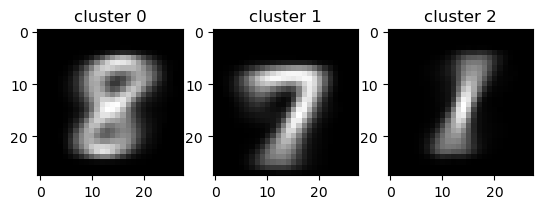

In [390]:
display(HTML("<h3>gmm on <b>digit</b> data set with covariance_type == full </h3>"))

fig = plt.figure()
for i in range(gm2.means_.shape[0]):
    ax1 = fig.add_subplot(1, 3, i + 1)
    ax1.imshow(gm2.means_[i].reshape(28, 28), cmap="gray")
    ax1.title.set_text(f"cluster {i}")

plt.show();

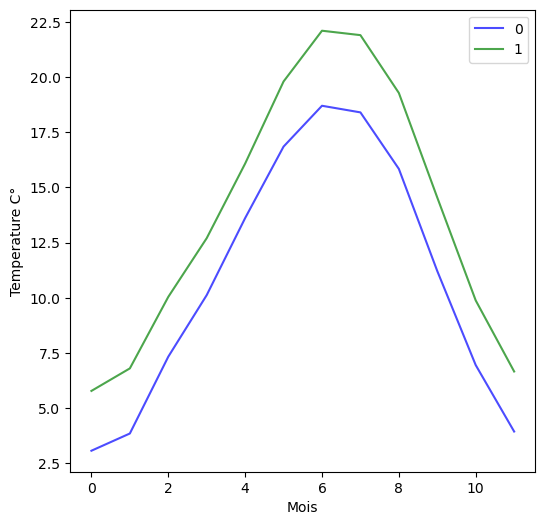

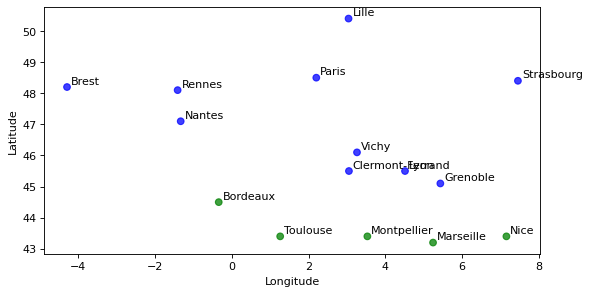

In [391]:
display(
    HTML("<h3>gmm on <b>temperatue</b> data set with covariance_type == full </h3>")
)

plt.figure(figsize=(6, 6))

for i, item in enumerate(gm.means_):

    plt.plot(item, label=i, c=colors[i], alpha=0.7)
plt.ylabel("Temperature C°")
plt.xlabel("Mois")
plt.legend()
plt.figure(figsize=(8, 4), dpi=80)

plt.scatter(
    cord[:, 1],
    cord[:, 0],
    marker="o",
    c=[colors[i] for i in estimated_class_gm],
    linewidths=1,
    alpha=0.75,
)

for i, point in enumerate(cord):
    plt.annotate(cities[i], (cord[i, 1] + 0.1, cord[i, 0] + 0.1))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

- when we change the covariance type to <b> sphérique </b> , the results are exactly the same as k-means, because the resulting clustering will have similar characteristics to that of k-means, though it is not entirely equivalent.

- when we change the covariance type to <b> full </b> , the ellipse is no more necessery along axis , so it allows each cluster to be modeled as an ellipse with arbitrary orientation. however it's complicated and computationally expensive

- when we change the covariance type to <b> diag </b> , which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes

#### 3.1.4
Compute the log probability of the samples for the estimated density (model.score_samples(x)).
Recover the samples with the smallest score (probability) and plot them. They can be considered as
outliers for the distribution (least probable samples). Wan you see why?


the log probability of the samples for the estimated density are [2919.6  2852.71 2907.81 ... 2366.83 2210.89 2382.33] 

the following samples have the smallest score probability


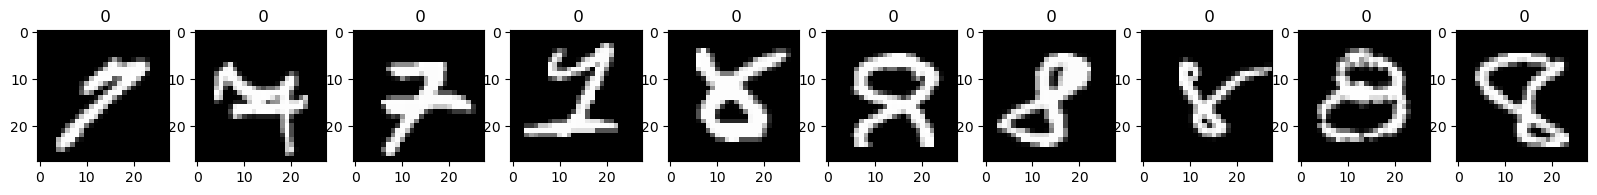

In [393]:
print(
    f"the log probability of the samples for the estimated density are {gm2.score_samples(x2)} \n"
)

print("the following samples have the smallest score probability")
NSamples = 10
idx = np.argpartition(gm2.score_samples(x2), NSamples)
idx = idx[:NSamples]
fig = plt.figure(figsize=(20, 6))
for i, idx in enumerate(idx):
    ax1 = fig.add_subplot(1, NSamples, i + 1)
    ax1.imshow(x2[idx].reshape(28, 28), cmap="gray")
    ax1.title.set_text(f" {gm2.predict(x2)[idx]}")

plt.show()

- Yes, obviously they could be considered as outliers, since even a human can't distinguish between them, indeed for isntance the forth plot (shows 7 ) isn't clear at all, and it looks like one 

#### 3.1.5
Digits dataset : Estimate the labels of the samples (model.predict) and compute the clustering rand
score. Is it better than Kmeans? Why?

In [44]:
# gmm model with full
gm2 = GaussianMixture(n_components=3, random_state=0, covariance_type="full").fit(x2)
estimated_class_gm2 = gm2.predict(x2)
score = rand_score(y2.flatten(), estimated_class_gm2)
print(
    f"the quality of the clustering using the ground truth labels **rand_score** for gmm with full covariance: {score*100:.2f}"
)

# gmm model with diag
gm2 = GaussianMixture(n_components=3, random_state=0, covariance_type="diag").fit(x2)
estimated_class_gm2 = gm2.predict(x2)
score = rand_score(y2.flatten(), estimated_class_gm2)
print(
    f"the quality of the clustering using the ground truth labels **rand_score** for gmm with diag covariance : {score*100:.2f}"
)

# gmm model with spherical
gm2 = GaussianMixture(n_components=3, random_state=0, covariance_type="spherical").fit(
    x2
)
estimated_class_gm2 = gm2.predict(x2)
score = rand_score(y2.flatten(), estimated_class_gm2)
print(
    f"the quality of the clustering using the ground truth labels **rand_score** for gmm with spherical covariance: {score*100:.2f}"
)

# k means

kmeans2 = KMeans(n_clusters=3, random_state=0).fit(x2)

estimated_class2 = kmeans2.labels_
cluster_centroid2 = kmeans2.cluster_centers_

print(f"the k-means score is {rand_score(y2.flatten(), estimated_class2)*100 :.2f}")

the quality of the clustering using the ground truth labels **rand_score** for gmm with full covariance: 88.30
the quality of the clustering using the ground truth labels **rand_score** for gmm with diag covariance : 76.16
the quality of the clustering using the ground truth labels **rand_score** for gmm with spherical covariance: 90.37
the k-means score is 88.16


- We notice that gmm with diag covariance explain less the distribution of data. and we explain that by the fact that we imposes the ellipse to go along axis and not in any possible direction

- however spherical covariance gives the best results. which means the model is a little bit overfitted , since the full convariance gives less accuracy. indeed , the full covariance, tolerate the ellipse to take any possible directions only to minimize the variance without constrants, so it's difficult to overfit , but in the same time very expensive in term of memory

#### 3.1.6 bonus
(Bonus) generate samples from the distribution (model.samples) and plot them. Could you differentiate them from real data?

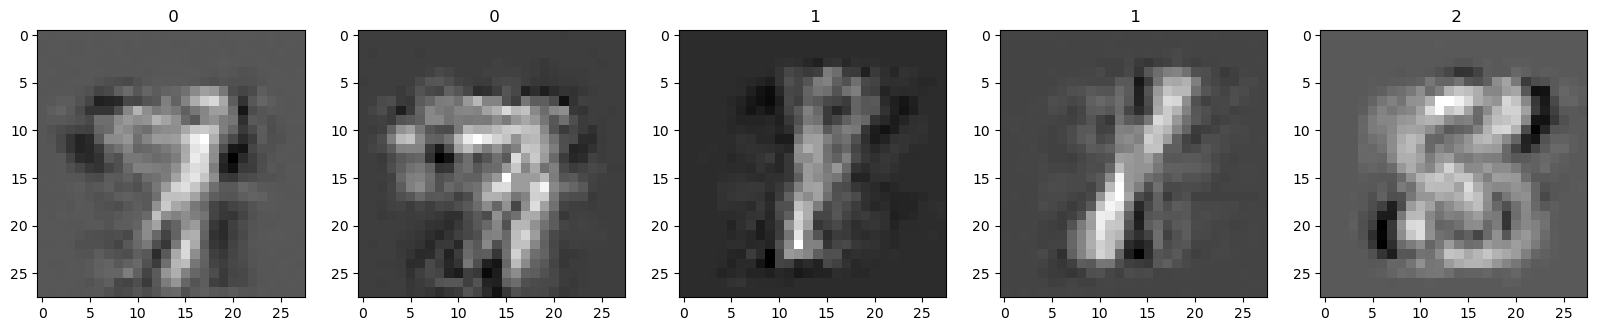

In [394]:
display(
    HTML(
        "<h3>generating more samples by gmm <b>digit</b> data set with covariance_type == full </h3>"
    )
)

gm2 = GaussianMixture(n_components=3, random_state=123, covariance_type="full").fit(x2)
fig = plt.figure(figsize=(20, 6))
samples = gm2.sample(5)
for i, sample in enumerate(samples[0]):
    ax1 = fig.add_subplot(1, 5, i + 1)
    ax1.imshow(sample.reshape(28, 28), cmap="gray")
    ax1.title.set_text(f" {samples[1][i]}")

plt.show()

- yes, we can easily differentiate them from real data, since they are just sample from the distribution that fitted our data , but not necessery every element of this distribution reflect reality or even close to it. but as a human and with so much effortt , we can tell which number is in each image

# 4  Dimensionality reduction

## 4.1 Linear Projection : Principal Component Analysis

### 4.1.1 

Compute the covariance matrix of the data and plot it as an image (np.cov(x.T)). Interpret the
structure of the covariance matrix using your knowledge of the data (relations between features).


In [395]:
# computing covariance
cov = np.cov(x1.T)
cov2 = np.cov(x2.T)

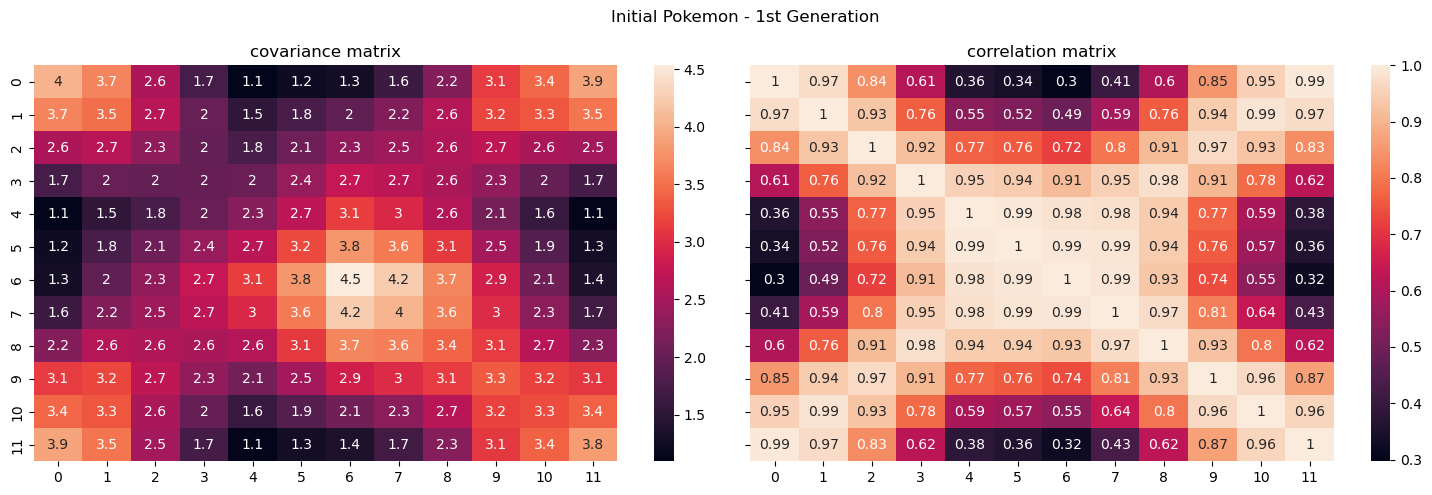

In [396]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Initial Pokemon - 1st Generation")

# Bulbasaur
sns.heatmap(cov, annot=True, ax=axes[0])
axes[0].set_title("covariance matrix")

# Charmander
sns.heatmap(np.corrcoef(x1.T), annot=True, ax=axes[1])
axes[1].set_title("correlation matrix")
plt.tight_layout()
# plt.xlabel("Corr")
# plt.show()

<ul>
<li>We notice that the whole covariance matrix is positive, so the variables vary in the same direction</li> 
<li>moreover we notice that the correlation between each month and it's neighbours is very high</li>
</ul>

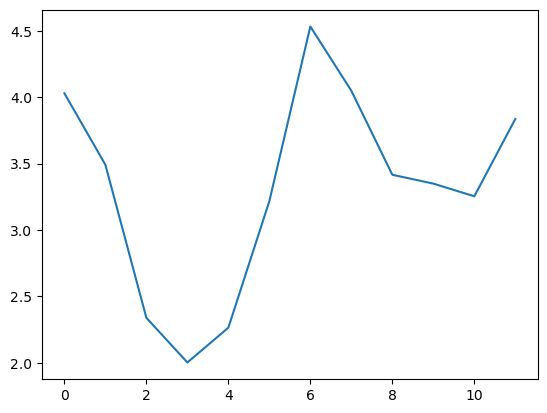

In [398]:
display(HTML("<h3>ploting the variance of each feature (month) </h3>"))

plt.plot(np.diag(cov));

<ul>
<li>We notice that the variance for summer and winter seasons is very high, because the temperature of those months is dispatched</li> 
<li>Hence, during spring and fall, the temperature distribution is moderate</li>
</ul>

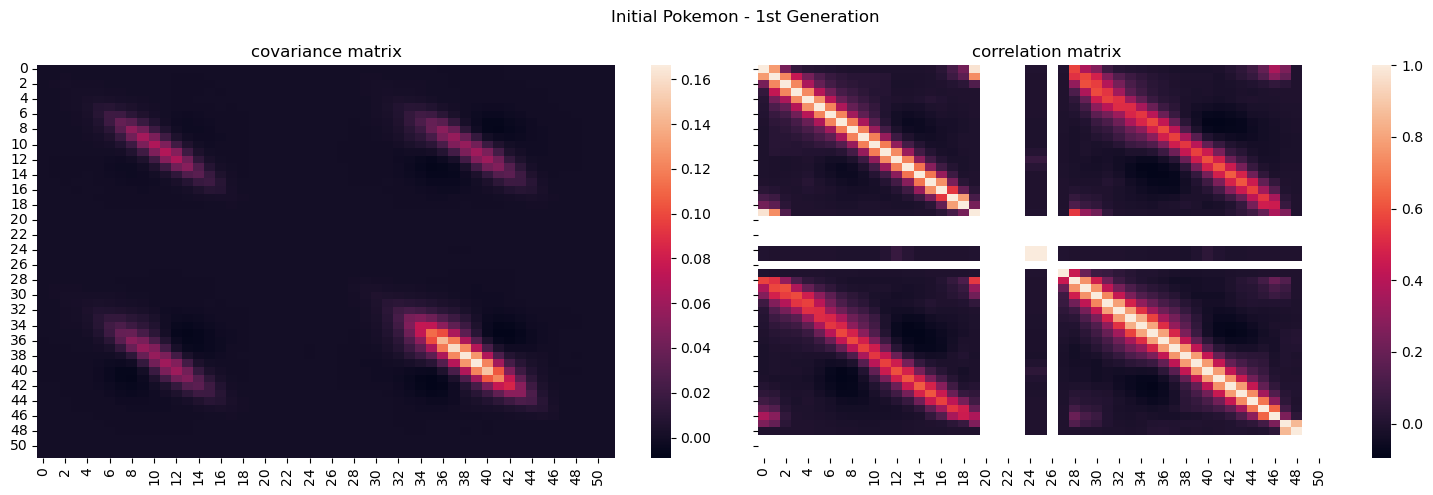

In [399]:
display(
    HTML("<h3>Ploting the correlation and covariance matrix for <b> digits</b> </h3>")
)

import seaborn as sns

# figure = plt.figure(figsize=(12, 6))
correlation2 = np.corrcoef(x2.T)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Initial Pokemon - 1st Generation")

sns.heatmap(cov2[118:170, 118:170], ax=axes[0])
axes[0].set_title("covariance matrix")

sns.heatmap(correlation2[118:170, 118:170], ax=axes[1])
axes[1].set_title("correlation matrix")
plt.tight_layout()

- we notice that the correlation between two neighbour is very high ( colors around the diagonal )

- we can also notice that a given feature and their neighbours by 28 step from right and left are also highly correlated, because they are exactly their neighbours (from top and buttom) in the real image  (padding of 28 because of the reshape (784,1)) , which explain that each pixel ( feature) is likely very close from its neighbours from left, right, top and buttom

### 4.1.2
 Compute the PCA (keeping all dimensions with n_components=None) for the data and recover the
explained variance ratio (stored in model.explained_variance_ratio_) that is the proportion of
energy in each principal direction stored. Plot it and discuss the quantity of information preserved
when projecting on p = 2 dimensions.


In [400]:
from sklearn.decomposition import PCA


display(HTML("<h3> <b>Temerature</b> data set</h3>"))
pca = PCA(n_components=None)
pca.fit(x1)

print(
    f"the propotion of energy in each principal directions \n {pca.explained_variance_ratio_*100}\n"
)
print(f"the singular values of X are \n {pca.singular_values_}\n")
print(f"the explained variances per feature are \n {pca.explained_variance_}\n")

# ////////////////////////////////////////////////////////////////

display(HTML("<h3> <b>Digits</b> data set</h3>"))
pca2 = PCA(n_components=None)
pca2.fit(x2)

print(
    f"the propotion of energy in first 10 principal directions \n {pca2.explained_variance_ratio_[:10]*100}\n"
)
print(f"the first 10 singular values of X are \n {pca2.singular_values_[:10]}\n")
print(
    f"the explained variances per feature for the first 10 are \n {pca2.explained_variance_[:10]}\n"
)

the propotion of energy in each principal directions 
 [78.31 20.66  0.48  0.28  0.11  0.07  0.06  0.01  0.01  0.    0.    0.  ]

the singular values of X are 
 [20.88 10.73  1.64  1.25  0.8   0.61  0.56  0.28  0.25  0.15  0.11  0.03]

the explained variances per feature are 
 [31.15  8.22  0.19  0.11  0.05  0.03  0.02  0.01  0.    0.    0.    0.  ]



the propotion of energy in first 10 principal directions 
 [15.45 11.5   7.35  5.97  4.6   3.62  3.22  2.28  2.04  1.83]

the first 10 singular values of X are 
 [142.35 122.79  98.17  88.45  77.63  68.88  65.02  54.65  51.77  48.97]

the explained variances per feature for the first 10 are 
 [6.76 5.03 3.21 2.61 2.01 1.58 1.41 1.   0.89 0.8 ]



Normally the explained variance is exactly the diag of the eign values (SVD) of Cov(X), and it's = 

$\lambda_{i} = \frac{\Sigma^2}{n - 1}$

such that $\Sigma $ : the matrix of singular values of X

explained variance by the first 100 components of the digits dataset 93.13%


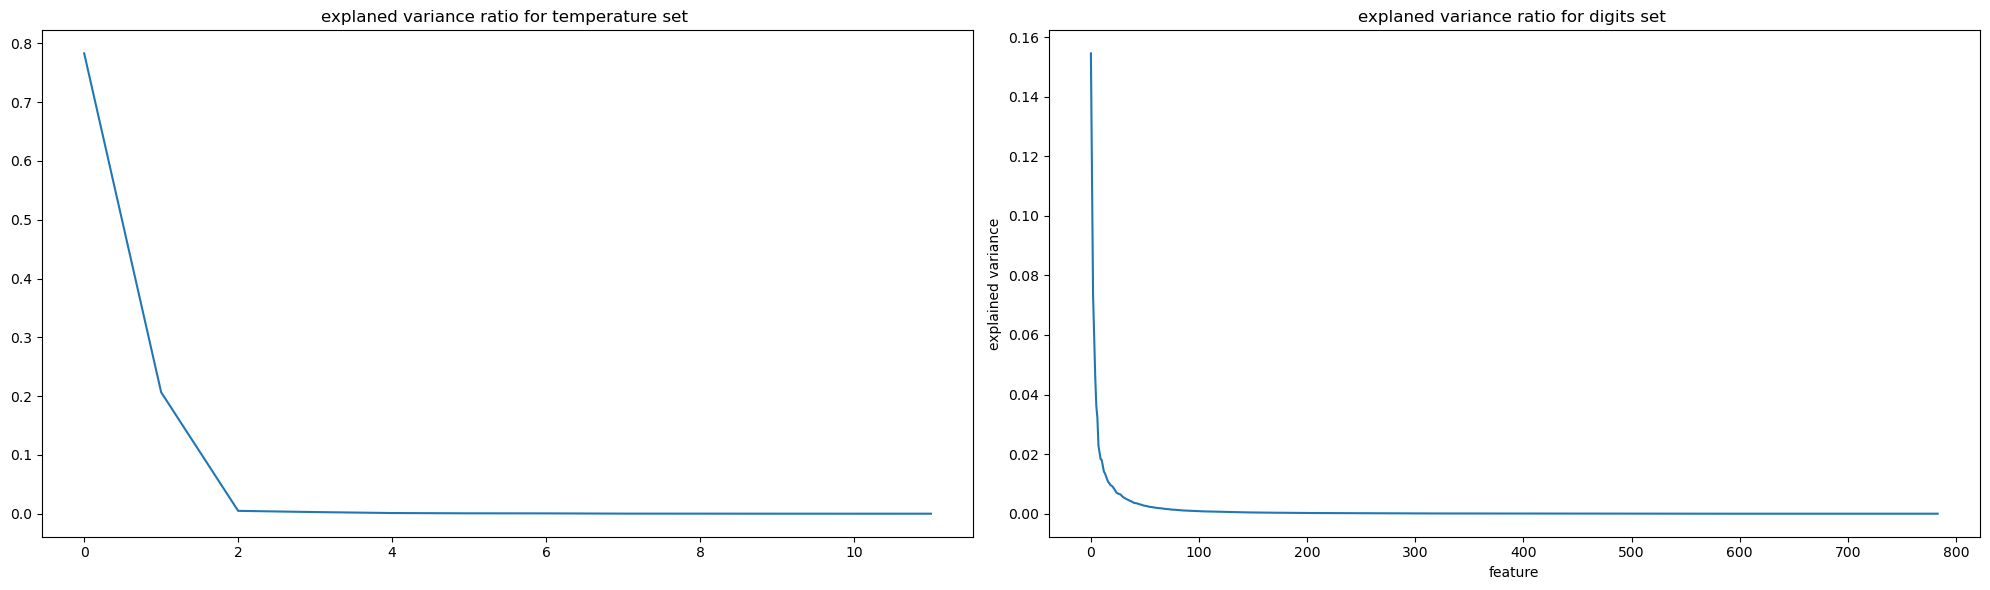

In [402]:
display(HTML("<h3>plot of the explained variance by component </h3>"))

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].plot(pca.explained_variance_ratio_)
axs[0].title.set_text("explaned variance ratio for temperature set ")
axs[1].plot(pca2.explained_variance_ratio_)
axs[1].title.set_text("explaned variance ratio for digits set ")
plt.xlabel("feature")
plt.ylabel("explained variance")
plt.tight_layout()
print(
    f"explained variance by the first 100 components of the digits dataset {pca2.explained_variance_ratio_[:100].sum()*100:.2f}%"
)

<b>for temperature dataset</b>
we notice that the explained variance is releavent mainly in the 2 first components, however we can delete the others and still have more than 99% of explained variance
in other words, if we choose just two components, we will have an explained variance of +99%, which means that the projected data still represent almost all the informations existing in the original dataset. 

<b>for digits dataset</b>
here, we can assume that less than 100 components are enough to make prediction on the new space (space of orthogonal projection) , because they explain almost 93 of the total variance

Moreover, this technique helps us to reduce the huge computational cost while preserving the hidden informations, and without traditional feature selection (deleting features directly from the original set )

### 4.1.3
<i>Project the samples in p = 2 dimensions and plot the projected samples (model.transform(x)). For
temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)) for a
better interpretation. For the digits dataset, color the samples with their class in the scatterplot.
Interpret the relations between the samples, what information is preserved and is it correlated to what
your know about the samples (geographic position or true class) ?</i>

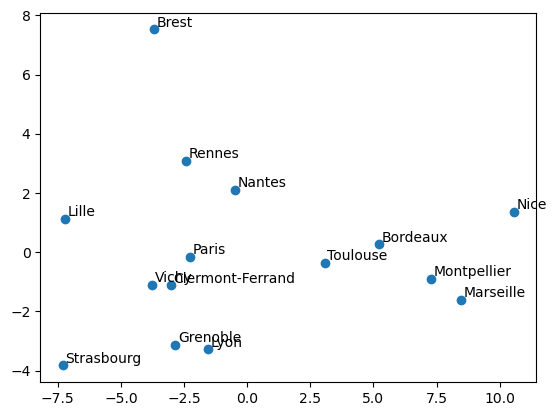

In [403]:
display(HTML("<h3> <b>Temerature</b> data set projection on two components</h3>"))
pca = PCA(n_components=2)
proj = pca.fit_transform(x1)
compT1, compT2 = pca.components_
plt.scatter(proj[:, 0], proj[:, 1])
for i in range(len(proj)):
    plt.annotate(cities[i], (proj[i, 0] + 0.1, proj[i, 1] + 0.1))

- We notice that the south cities are very close to each other (bordeau , nice, marseille etc), and the same for the ouest cities, however the very moderate climate of brest is obvious in this plot, even if we can put it in the same cluster with rennes and nantes, 

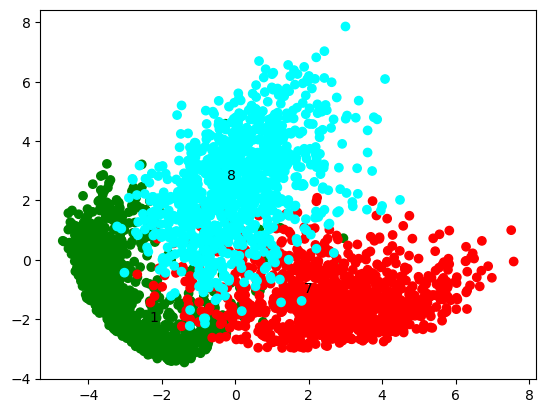

In [404]:
display(HTML("<h3> <b>digits</b> data set projections on Two components</h3>"))
pca2 = PCA(n_components=2)
proj2 = pca2.fit_transform(x2)
plt.scatter(
    proj2[:, 0],
    proj2[:, 1],
    c=[colors[i % 5] for i in y2.flatten()],
)
for i in [700, 1002, 2005]:
    plt.annotate(y2.flatten()[i], (proj2[i, 0] + 0.1, proj2[i, 1] + 0.1))

- As we mentioned before, there is an overlaping between the three clusters, indeed some samples couldn't be classified easily even with a human.

- Moreover, the various points corresponding to various digits still cluster nicely.

- The location of these points will compose a probability density function, which could be combined with probabilistic methods to produce a prediction of what digit a point comes from based on where it is located.


### 4.1.4
Get the the two first principal directions (model.components_) from the model. Plot them and
interpret them. What is the impact of moving along those direction in the original space?

In [407]:
comp1, comp2 = pca2.components_

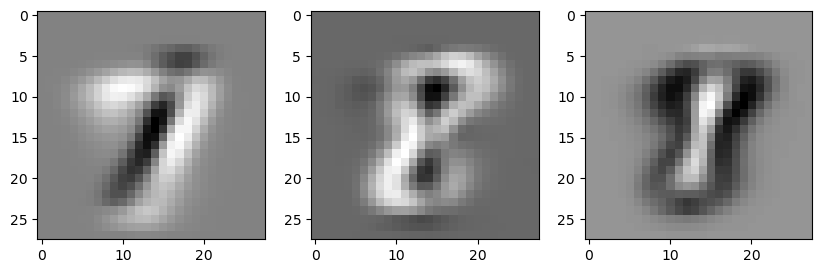

In [408]:
display(HTML("<h3> <b>digits</b> data set</h3>"))

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow((comp1).reshape(28, 28), cmap="gray")
axs[1].imshow((comp2).reshape(28, 28), cmap="gray")
axs[2].imshow(((comp1 * (-2)) + (comp2 * (-2))).reshape(28, 28), cmap="gray")

# ax1.title.set_text(f'cluster {i}')

pl.show()

- We noticed that the edges of the pictures are filled with fixed values cause these places have the minimum of variance.
- The two components of PCA capture the variation in the center of the image where we have the maximum of variance.
- the three classes are a linear combinaison of the two components: we get the class 8 as a positive combination with bias to the second one. For class 7, it is similar to the class 8 but with bias to the first componant. The class 1 comes from a negative combination of the two components.

- when we move along the first component we are converging towards 7 , hence when we move along the second componenet we are converging towards 8 

indeed, the one number is hidden in a combinaision between first and second component in the negative sense (in order to show the hidden state  )

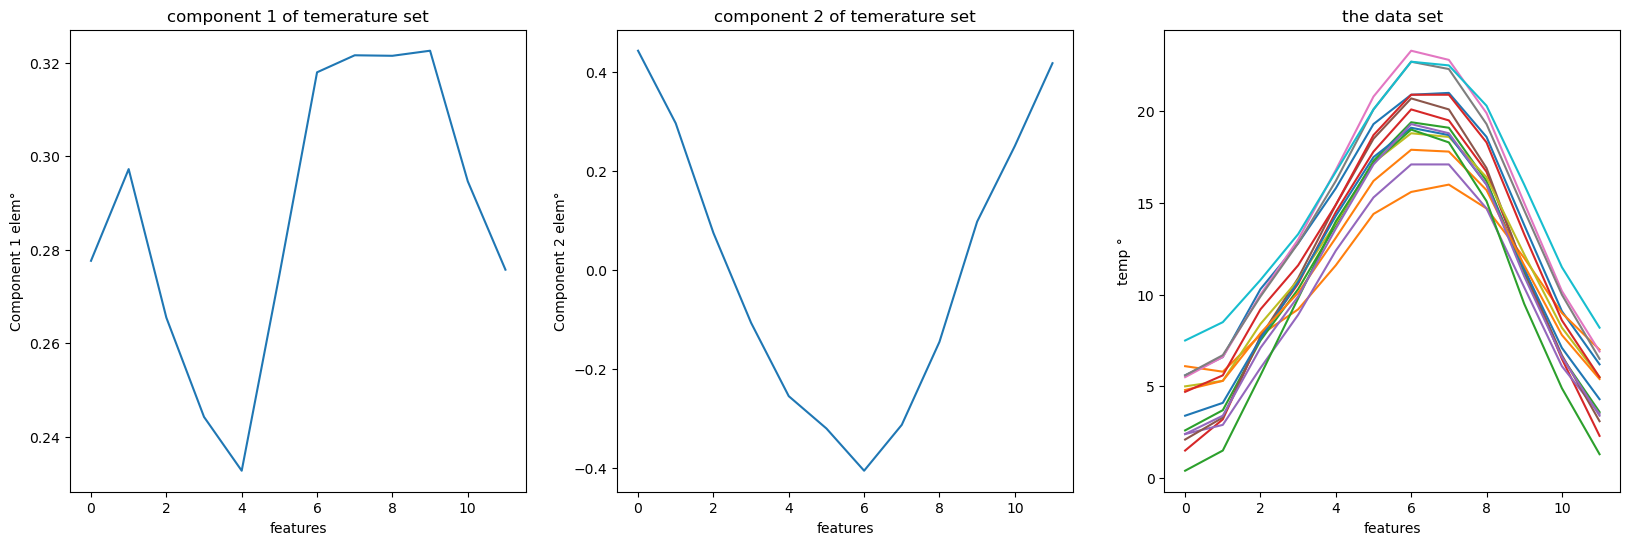

In [415]:
display(HTML("<h3> <b>Temerature </b> data set</h3>"))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].plot(compT1)
axs[0].title.set_text("component 1 of temerature set")
axs[0].set_ylabel("Component 1 elem°")
axs[0].set_xlabel("features")
axs[1].plot(compT2)
axs[1].title.set_text("component 2 of temerature set")
axs[1].set_ylabel("Component 2 elem°")
axs[1].set_xlabel("features")
axs[2].plot(x1.T)
axs[2].title.set_text("the data set")
axs[2].set_ylabel("temp °")
axs[2].set_xlabel("features");

- we notice that the first component encode the temperature difference between cities  which is high in winter and in summer (the extrem seasons) however it's moderate during spring and fall
- the second componenet encodes the negative variation of temperature during months , which is low in summer and high in winter 

### 4.1.5
Reconstruct the data from the projected samples (model.inverse_transform(xp)) for different subspace dimension p. For a few samples in the dataset plot, the sample and its reconstruction. Is it still
recognizable? Look at the impact of p on the quality of reconstruction.


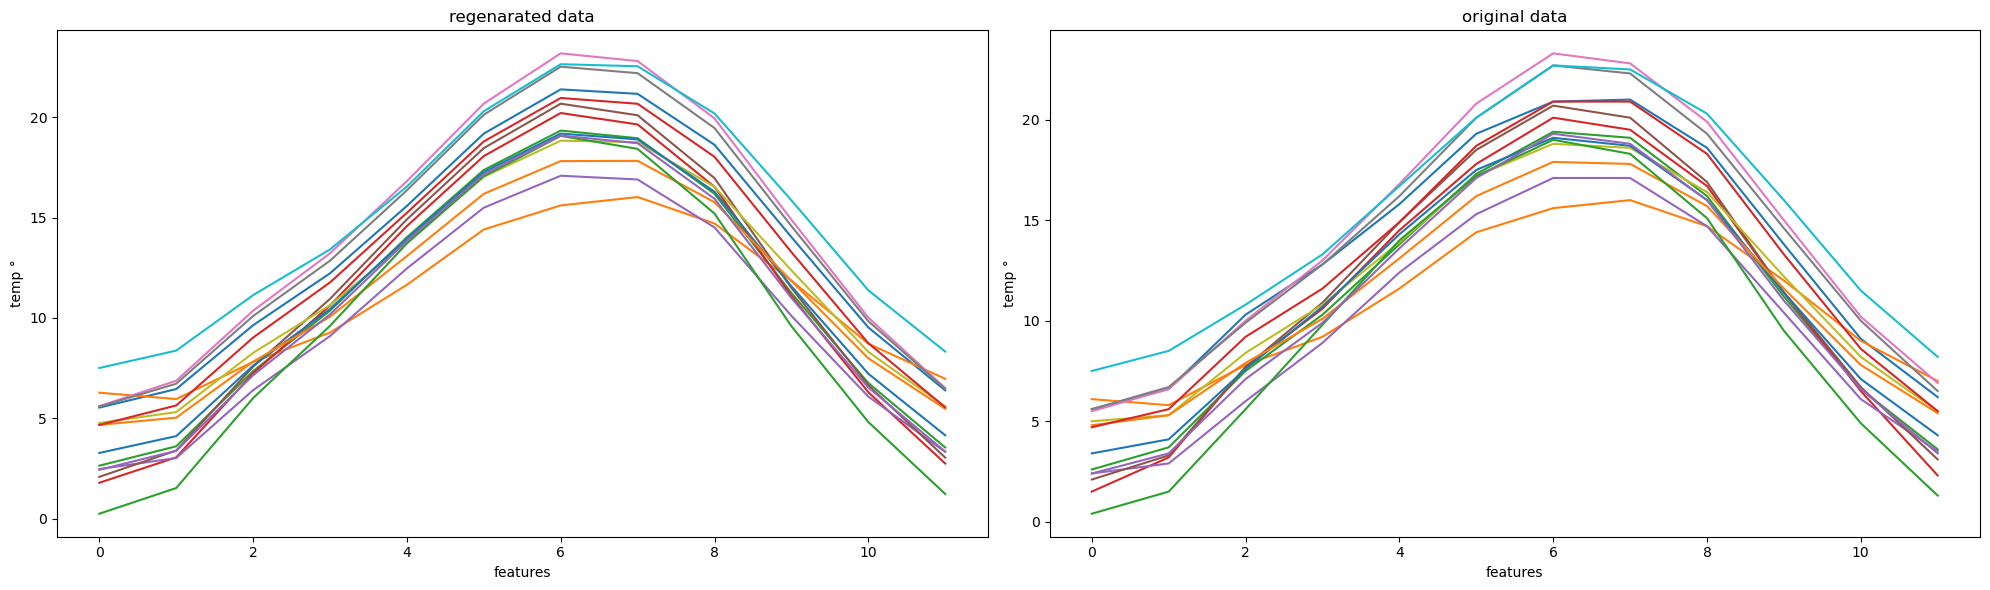

In [416]:
display(HTML("<h3> <b>Temerature </b> data set</h3>"))

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(pca.inverse_transform(proj).T)
ax[0].title.set_text("regenarated data")
ax[0].set_ylabel("temp °")
ax[0].set_xlabel("features")
ax[1].plot(x1.T)
ax[1].title.set_text("original data")
ax[1].set_ylabel("temp °")
ax[1].set_xlabel("features")
plt.tight_layout()

- we notice that the reconstructed data is almost the same as the original data, because the pca explained variance is almost 99%

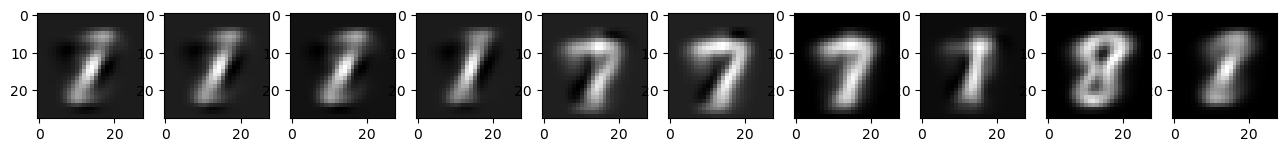

In [417]:
display(HTML("<h3> <b>digits</b> data set</h3>"))

reconstructed_digits = pca2.inverse_transform(proj2)
fig, ax = plt.subplots(1, 10, figsize=(16, 4))

for i, item in enumerate(reconstructed_digits[::300]):
    ax[i].imshow(item.reshape(28, 28), cmap="gray")
plt.show()

In [418]:
print(
    f"the explained variance by two componenets {pca2.explained_variance_ratio_.sum()*100:.2f} %"
)

the explained variance by two componenets 26.95 %


- the reconstructred data isn't very relevant, and it was expected because the explained varies when we use only 2 components is almost 27% which is not enough. but even with this low variance, we can detect the the number by eyes

## 4.2 Manifold Learning : TSNE


### 4.2.1
Compute the TSNE embedding of the data for in p = 2 for both datasets (sklearn.manifold.TSNE).


In [310]:
from sklearn.manifold import TSNE

tsne_t = TSNE(n_components=2, perplexity=2)
X_embedded_t = tsne_t.fit_transform(x1);

In [325]:
tsne_digits = TSNE(n_components=2, perplexity=2)
X_embedded_digits = tsne_digits.fit_transform(x2)

### 4.2.2 
Project the samples and plot them. For temperature data also plot the name of the city close to
the sample (pl.text(x,y,’text’)). For the digits dataset, color the samples with their class in the
scatterplot.


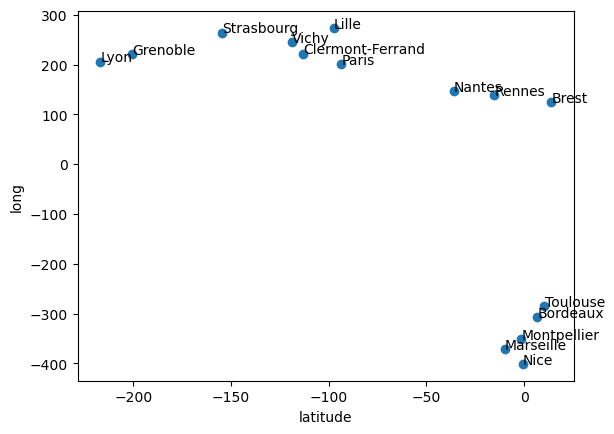

In [419]:
display(HTML("<h3> <b>Temerature</b> data set</h3>"))
plt.scatter(X_embedded_t[:, 0], X_embedded_t[:, 1])
for i in range(len(X_embedded_t)):
    plt.annotate(cities[i], (X_embedded_t[i, 0] + 0.1, X_embedded_t[i, 1] + 0.1))
plt.xlabel("latitude")
plt.ylabel("long");

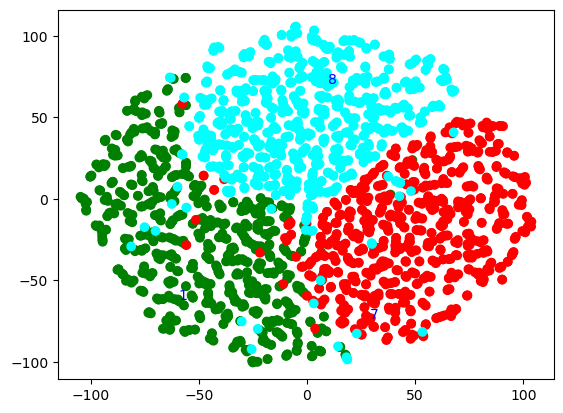

In [420]:
display(HTML("<h3> <b>digits</b> data set</h3>"))

plt.scatter(
    X_embedded_digits[:, 0],
    X_embedded_digits[:, 1],
    c=[colors[i % 5] for i in y2.flatten()],
)
for i in [900, 1012, 2005]:
    plt.annotate(
        y2.flatten()[i],
        (X_embedded_digits[i, 0] + 0.1, X_embedded_digits[i, 1] + 0.1),
        color="blue",
    )

### 4.2.3
What is the effect of the perplexity parameter? Does the embedding recover geographical relations
for the temperature dataset? Is the embedding more discriminant in 2D for the digits dataset than
the ACP?

- the perplexity says (loosely) how to balance attention between local and global aspects of data. The parameter is, in a sense, a guess about the number of close neighbors each point has. 
- we can see cleary in the figure abouve that the classification of cities based on temperature distinguish perfectly between the the regions in the south and the others of the nord. moreover, it separate slightly between those in ouest and in est 

- yes we notice that the embedding is very discriminant in 2D for digits dataset, and better of the ACP discrimination,. however it's very difficuult to interpret the componenets